<a href="https://colab.research.google.com/github/skredenmathias/DS-Unit-1-Build/blob/master/Sprint_1_Build_Week.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This notebook could be much cleaner, but I am uncertain if that is asked of me given that I dropped this notebook.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [0]:
!git clone https://github.com/skredenmathias/DS-Unit-1-Build.git

fatal: destination path 'DS-Unit-1-Build' already exists and is not an empty directory.


In [0]:
path = '/content/DS-Unit-1-Build/'

In [0]:
worlds_2019 = pd.read_excel(path+'2019-summer-match-data-OraclesElixir-2019-11-10.xlsx')

In [0]:
(print(worlds_2019.shape))
worlds_2019.head()

(1428, 98)


,gameid,url,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,...,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,1,Blue,Top,Evi,DetonatioN FocusMe,Gnar,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,0,4,4,7,22,0,0,0,0,0,0,0,3.879983,0.000000,0.037688,1.092965,0,9.717567,1,...,23.779817,0,1,11588,436.733668,0.312067,0.206844,11,0.414573,0.105769,4,0.150754,4,6,,,8407,184.059799,8300,-0.151448,180,8,4,1,7.085427,3078,3440,-362,4670,5468,-798,4530,5051,-521,76,90,-14,116,122,-6
1,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,2,Blue,Jungle,Steal,DetonatioN FocusMe,Ekko,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,1,4,5,7,22,0,0,0,0,0,0,0,3.879983,0.037688,0.263819,1.092965,1,9.717567,1,...,23.779817,0,1,7925,298.680905,0.213422,0.166862,24,0.904523,0.230769,8,0.301508,11,13,,,7463,148.481910,7360,-0.296789,35,96,76,0,4.937186,3684,4055,-371,4912,6278,-1366,3679,3928,-249,60,64,-4,88,105,-17
2,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,3,Blue,Middle,Ceros,DetonatioN FocusMe,Nocturne,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,1,5,6,7,22,0,0,0,0,0,0,0,3.879983,0.037688,0.113065,1.092965,0,9.717567,1,...,23.779817,0,1,7557,284.811558,0.203512,0.210106,13,0.489950,0.125000,1,0.037688,6,7,,,8484,186.961809,7700,-0.281729,186,6,4,0,7.236181,3926,3569,357,5487,6116,-629,4751,4533,218,88,85,3,131,150,-19
3,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,4,Blue,ADC,Yutapon,DetonatioN FocusMe,Lucian,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,3,4,1,7,22,1,0,0,0,0,0,0,3.879983,0.113065,0.414573,1.092965,0,9.717567,1,...,23.779817,0,1,7369,277.726131,0.198449,0.300743,9,0.339196,0.086538,7,0.263819,3,4,,,10624,267.615075,10150,-0.215385,219,20,20,0,9.007538,3579,3969,-390,5313,7142,-1829,3526,3532,-6,87,76,11,119,134,-15
4,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,5,Blue,Support,Gaeng,DetonatioN FocusMe,Thresh,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,2,5,2,7,22,0,0,0,0,0,0,1,3.879983,0.075377,0.000000,1.092965,0,9.717567,1,...,23.779817,0,1,2694,101.532663,0.07255,0.115445,47,1.771357,0.451923,8,0.301508,13,14,,,6249,102.728141,5450,-0.296875,12,2,2,0,0.527638,2088,2394,-306,3163,4319,-1156,2731,2376,355,4,3,1,6,5,1


In [0]:
year_2016 = pd.read_excel(path+'2016 complete match data OraclesElixir 2018-12-18.xlsx')

In [0]:
# Confirming the datasets have the same attributes
print(year_2016.dtypes)
year_2016.head(10)

gameid                  int64
url                    object
league                 object
split                  object
date           datetime64[ns]
                    ...      
oppgoldat15             int64
gdat15                  int64
xpat10                float64
oppxpat10             float64
xpdat10               float64
Length: 84, dtype: object


,gameid,url,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,oppdragkills,herald,heraldtime,...,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,cssharepost15,csat10,oppcsat10,csdat10,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10
0,1001470051,http://matchhistory.na.leagueoflegends.com/en/...,EULCS,2016-1,2016-01-14 11:58:56,1,1,6.01,1,Blue,Top,Gamsu,Fnatic,Olaf,Kindred,Kassadin,Tahm Kench,35.95,1,9,1,3,22,8,NaN,NaN,NaN,NaN,0,0,NaN,0.250348,0.027816,0.834492,0,10.4983,3,1,1.0,NaN,...,0,1.0,30.426017,1,0,22264,619.304590,0.252272,0.225269,18,0.500695,0.155172,12,0.333797,2,2,NaN,NaN,16029,316.370515,15150,0.399050,288,3,0,3,8.094576,0.230876,76,69,7,3351,2845,506,5319,4444,875,4369.0,3841.0,528.0
1,1001470051,http://matchhistory.na.leagueoflegends.com/en/...,EULCS,2016-1,2016-01-14 11:58:56,1,1,6.01,2,Blue,Jungle,Spirit,Fnatic,Zac,Kindred,Kassadin,Tahm Kench,35.95,1,3,1,13,22,8,NaN,NaN,NaN,NaN,0,0,NaN,0.083449,0.055633,0.834492,0,10.4983,3,1,1.0,NaN,...,0,1.0,30.426017,1,0,10383,288.817803,0.117649,0.177258,27,0.751043,0.232759,15,0.417246,6,6,NaN,NaN,13605,248.943533,12575,0.270880,37,109,83,26,4.061196,0.107093,43,35,8,3265,2843,422,4936,4308,628,3478.0,3153.0,325.0
2,1001470051,http://matchhistory.na.leagueoflegends.com/en/...,EULCS,2016-1,2016-01-14 11:58:56,1,1,6.01,3,Blue,Middle,Febiven,Fnatic,LeBlanc,Kindred,Kassadin,Tahm Kench,35.95,1,4,2,10,22,8,NaN,NaN,NaN,NaN,0,0,NaN,0.111266,0.055633,0.834492,0,10.4983,3,1,1.0,NaN,...,0,1.0,30.426017,1,0,23187,644.979138,0.262730,0.238520,19,0.528512,0.163793,9,0.250348,3,3,NaN,NaN,16698,334.979694,14475,0.022707,287,19,18,1,8.511822,0.254520,82,81,1,3256,3192,64,5309,5069,240,4593.0,4711.0,-118.0
3,1001470051,http://matchhistory.na.leagueoflegends.com/en/...,EULCS,2016-1,2016-01-14 11:58:56,1,1,6.01,4,Blue,ADC,Rekkles,Fnatic,Lucian,Kindred,Kassadin,Tahm Kench,35.95,1,4,2,9,22,8,NaN,NaN,NaN,NaN,0,1,NaN,0.111266,0.055633,0.834492,0,10.4983,3,1,1.0,NaN,...,0,1.0,30.426017,1,0,25046,696.689847,0.283795,0.245927,18,0.500695,0.155172,9,0.250348,2,2,NaN,NaN,17072,345.383032,15250,0.279522,364,26,18,8,10.848401,0.368567,83,83,0,3201,3209,-8,4855,5009,-154,3450.0,3103.0,347.0
4,1001470051,http://matchhistory.na.leagueoflegends.com/en/...,EULCS,2016-1,2016-01-14 11:58:56,1,1,6.01,5,Blue,Support,Noxiak,Fnatic,Poppy,Kindred,Kassadin,Tahm Kench,35.95,1,2,2,10,22,8,NaN,NaN,NaN,NaN,0,0,NaN,0.055633,0.027816,0.834492,0,10.4983,3,1,1.0,NaN,...,0,1.0,30.426017,1,0,7374,205.118220,0.083554,0.113026,34,0.945758,0.293103,10,0.278164,3,4,NaN,NaN,10362,158.734910,9500,0.222222,44,1,0,1,1.251739,0.038943,12,9,3,2124,2331,-207,3166,3384,-218,2766.0,2570.0,196.0
5,1001470051,http://matchhistory.na.leagueoflegends.com/en/...,EULCS,2016-1,2016-01-14 11:58:56,1,1,6.01,6,Red,Top,Soaz,Origen,Lissandra,Lulu,Gangplank,Ryze,35.95,0,1,8,4,8,22,NaN,NaN,NaN,NaN,0,0,NaN,0.027816,0.250348,0.834492,0,10.4983,1,3,0.0,NaN,...,11,0.0,30.426017,0,1,13782,383.365786,0.168492,0.178946,18,0.500695,0.152542,2,0.055633,4,4,NaN,NaN,10459,161.433102,10110,-0.399050,239,2,2,0,6.703755,0.206271,69,76,-7,2845,3351,-506,4444,5319,-875,3841.0,4369.0,-528.0
6,1001470051,http://matchhistory.na.leagueoflegends.com/en/...,EULCS,2016-1,2016-01-14 11:58:56,1,1,6.01,7,Red,Jungle,Amazing,Origen,Lee Sin,Lulu,Gangplank,Ryze,35.95,0,2,5,5,8,22,NaN,NaN,NaN,NaN,0,0,NaN,0.055633,0.083449,0.834492,0,10.4983,1,3,0.0,NaN,...,11,0.0,30.426017,0,1,13292,369.735744,0.162502,0.168864,34,0.945758,0.288136,5,0.139082,6,6,NaN,NaN,10132,152.337135,9575,-0.270880,34,79,78

In [0]:
year_2016.describe()

,gameid,patchno,playerid,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,oppdragkills,herald,heraldtime,ft,fttime,firsttothreetowers,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,cssharepost15,csat10,oppcsat10,csdat10,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10
count,1.982400e+04,19824.000000,19824.000000,19824.000000,19824.000000,19824.000000,19824.000000,19824.000000,19824.000000,19824.000000,9500.000000,9500.000000,9500.000000,9500.000000,19824.000000,19824.000000,14034.000000,19824.000000,19824.000000,19824.000000,19824.000000,19812.000000,19824.000000,19824.000000,13224.000000,2204.000000,19824.000000,19824.000000,19824.000000,19824.000000,19824.000000,18516.000000,18516.000000,19824.000000,19824.000000,19824.000000,19824.000000,16520.000000,16520.000000,19824.000000,19824.000000,19824.000000,19824.000000,19824.000000,19824.000000,19824.000000,3246.000000,3304.000000,19824.000000,19824.000000,19824.000000,1.982400e+04,19824.000000,19824.000000,19824.000000,19824.000000,19824.000000,16520.000000,19824.000000,19824.000000,19824.000000,19824.000000,19824.000000,19824.000000,19824.000000,19824.000000,19824.000000,19812.000000,19812.000000,19812.000000
mean,5.134371e+08,6.081725,29.583333,36.754681,0.500000,3.853914,3.862389,9.612490,11.561743,11.587167,0.238000,0.043158,0.008000,0.001263,0.166667,0.166667,7.017746,0.107175,0.107175,0.643052,0.166566,11.881198,1.922215,1.922215,0.500000,13.381957,0.500000,9.332808,0.500000,6.392554,6.392554,0.500000,28.085832,0.707324,0.707324,24661.232647,657.800669,0.200000,0.200000,43.211158,1.165222,0.333333,17.844633,0.471321,8.103612,8.838680,0.692685,0.261367,21742.808717,375.178783,20124.478309,-2.450174e-19,315.901130,52.113701,41.721247,10.392454,9.988806,0.200000,90.344229,90.344229,0.000000,5048.213680,5048.213680,0.000000,7869.867433,7869.867433,0.000000,5755.092166,5755.092166,0.000000
std,5.262141e+08,0.120814,57.651921,8.117961,0.500013,4.836827,4.615327,11.724174,6.426251,6.432594,0.550329,0.211349,0.089089,0.035520,0.372687,0.372687,4.185757,0.138205,0.138205,0.224044,0.372597,3.943045,1.414357,1.414357,0.500019,4.092658,0.500013,5.395390,0.500013,3.657147,3.657147,0.500014,4.834422,0.768651,0.768651,26895.917790,659.005024,0.099381,0.051747,43.958189,1.108441,0.313019,19.927870,0.481179,8.712522,9.375743,0.116008,0.073597,20813.019848,351.071076,19392.913909,1.865452e-01,322.464292,62.698451,50.250643,15.208183,9.426356,0.104829,85.916556,85.916556,14.335626,4556.841078,4556.841078,620.326177,7112.180694,7112.180694,1181.381887,5254.745720,5254.745720,647.718238
min,3.900610e+05,5.240000,1.000000,18.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.653583,0.000000,0.000000,0.071006,0.000000,3.685883,0.000000,0.000000,0.000000,4.273333,0.000000,3.105083,0.000000,0.000000,0.000000,0.000000,20.183150,0.000000,0.000000,142.000000,3.360947,0.002648,0.070444,1.000000,0.029955,0.008475,0.000000,0.000000,0.000000,0.000000,0.272727,0.020408,3522.000000,54.888430,2825.000000,-8.484848e-01,2.000000,0.000000,0.000000,0.000000,0.101523,0.000000,0.000000,0.000000,-92.000000,1690.000000,1690.000000,-7300.000000,2552.000000,2552.000000,-12081.000000,663.000000,663.000000,-4991.000000
25%,1.010398e+06,6.050000,3.750000,30.941667,0.000000,1.000000,1.000000,3.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.953400,0.023669,0.023669,0.479815,0.000000,9.295817,1.000000,1.000000,0.000000,10.458650,0.000000,3.732858,0.000000,3.000000,3.000000,0.000000,24.266250,0.000000,0.000000,84

In [0]:
year_2016.describe(exclude='number')

,url,league,split,date,week,game,side,position,player,team,champion,ban1,ban2,ban3
count,19824,19824,19824,19824,19824,19824.0,19824,19824,19824,19824,16520,19782,19800,19782
unique,1652,8,6,1652,87,7.0,2,6,449,71,115,80,85,87
top,http://matchhistory.na.leagueoflegends.com/en/...,LCK,2016-2,2016-06-05 17:26:08,SF,2.0,Blue,Middle,Team,SK Telecom T1,Braum,Nidalee,Nidalee,Ryze
freq,12,5628,10092,12,768,8340.0,9912,3304,3304,708,725,2316,1272,1632
first,NaN,NaN,NaN,2016-01-13 03:01:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2016-10-29 23:13:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
year_2017 = pd.read_excel(path+'2017matchdataOraclesElixir.xlsx')
year_2017.shape

(37404, 98)

In [0]:
worlds_2018 = pd.read_excel(path+'2018-worlds-match-data-OraclesElixir-2018-11-03.xlsx')
worlds_2018.shape

(1428, 98)

In [0]:
spring_2018 = pd.read_excel(path+'2018-spring-match-data-OraclesElixir-2018-05-20.xlsx')
spring_2018.shape

(15900, 98)

In [0]:
summer_2018 = pd.read_excel(path+'2018 summer match data OraclesElixir 2018-09-27.xlsx')
summer_2018.shape

(16188, 98)

In [0]:
spring_2019 = pd.read_excel(path+'2019-spring-match-data-OraclesElixir-2019-05-21.xlsx')
spring_2019.shape

(12864, 98)

In [0]:
summer_2019 = pd.read_excel(path+'2019-summer-match-data-OraclesElixir-2019-09-16.xlsx')
summer_2019.shape

(12612, 98)

In [0]:
# Merging dataframes 1/2
dfs = [year_2016, year_2017, spring_2018, summer_2018, worlds_2018, spring_2019, summer_2019, worlds_2019]

In [0]:
# Merging 2/2
test = pd.concat(dfs) # Consider dropping columns: cssharepost15, d?, playerid, position?, url, week

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
test.head()

,a,airdrakes,ban1,ban2,ban3,ban4,ban5,champion,ckpm,csat10,csat15,csdat10,csdat15,cspm,cssharepost15,d,date,dmgshare,dmgtochamps,dmgtochampsperminute,doubles,earnedgoldshare,earnedgpm,earthdrakes,elders,elementals,fb,fbaron,fbarontime,fbassist,fbtime,fbvictim,fd,fdtime,firedrakes,firstmidouter,firsttothreetowers,ft,fttime,game,...,oppbaronkills,oppcsat10,oppcsat15,oppdragkills,oppelders,oppelementals,oppgoldat10,oppgoldat15,opptowerkills,oppxpat10,patchno,pentas,player,playerid,position,quadras,result,side,split,team,teambaronkills,teamdeaths,teamdragkills,teamkills,teamtowerkills,totalgold,triples,url,visiblewardclearrate,visionwardbuys,visionwards,wardkills,wards,wardshare,waterdrakes,wcpm,week,wpm,xpat10,xpdat10
0,3.0,NaN,Kindred,Kassadin,Tahm Kench,NaN,NaN,Olaf,0.834492,76.0,NaN,7.0,NaN,8.094576,0.230876,1.0,2016-01-14 11:58:56,0.252272,22264.0,619.304590,NaN,0.225269,316.370515,NaN,NaN,NaN,0,1.0,30.426017,NaN,NaN,0,0,10.4983,NaN,NaN,1,1.0,15.896217,1,...,0.0,69.0,NaN,1.0,NaN,NaN,2845.0,4444.0,0.0,3841.0,6.01,NaN,Gamsu,1,Top,NaN,1,Blue,2016-1,Fnatic,1.0,8.0,3.0,22.0,11.0,16029.0,NaN,http://matchhistory.na.leagueoflegends.com/en/...,NaN,2.0,2,12.0,18.0,0.155172,NaN,0.333797,1,0.500695,4369.0,528.0
1,13.0,NaN,Kindred,Kassadin,Tahm Kench,NaN,NaN,Zac,0.834492,43.0,NaN,8.0,NaN,4.061196,0.107093,1.0,2016-01-14 11:58:56,0.117649,10383.0,288.817803,NaN,0.177258,248.943533,NaN,NaN,NaN,0,1.0,30.426017,NaN,NaN,0,0,10.4983,NaN,NaN,1,1.0,15.896217,1,...,0.0,35.0,NaN,1.0,NaN,NaN,2843.0,4308.0,0.0,3153.0,6.01,NaN,Spirit,2,Jungle,NaN,1,Blue,2016-1,Fnatic,1.0,8.0,3.0,22.0,11.0,13605.0,NaN,http://matchhistory.na.leagueoflegends.com/en/...,NaN,6.0,6,15.0,27.0,0.232759,NaN,0.417246,1,0.751043,3478.0,325.0
2,10.0,NaN,Kindred,Kassadin,Tahm Kench,NaN,NaN,LeBlanc,0.834492,82.0,NaN,1.0,NaN,8.511822,0.254520,2.0,2016-01-14 11:58:56,0.26273,23187.0,644.979138,NaN,0.23852,334.979694,NaN,NaN,NaN,0,1.0,30.426017,NaN,NaN,0,0,10.4983,NaN,NaN,1,1.0,15.896217,1,...,0.0,81.0,NaN,1.0,NaN,NaN,3192.0,5069.0,0.0,4711.0,6.01,NaN,Febiven,3,Middle,NaN,1,Blue,2016-1,Fnatic,1.0,8.0,3.0,22.0,11.0,16698.0,NaN,http://matchhistory.na.leagueoflegends.com/en/...,NaN,3.0,3,9.0,19.0,0.163793,NaN,0.250348,1,0.528512,4593.0,-118.0
3,9.0,NaN,Kindred,Kassadin,Tahm Kench,NaN,NaN,Lucian,0.834492,83.0,NaN,0.0,NaN,10.848401,0.368567,2.0,2016-01-14 11:58:56,0.283795,25046.0,696.689847,NaN,0.245927,345.383032,NaN,NaN,NaN,0,1.0,30.426017,NaN,NaN,1,0,10.4983,NaN,NaN,1,1.0,15.896217,1,...,0.0,83.0,NaN,1.0,NaN,NaN,3209.0,5009.0,0.0,3103.0,6.01,NaN,Rekkles,4,ADC,NaN,1,Blue,2016-1,Fnatic,1.0,8.0,3.0,22.0,11.0,17072.0,NaN,http://matchhistory.na.leagueoflegends.com/en/...,NaN,2.0,2,9.0,18.0,0.155172,NaN,0.250348,1,0.500695,3450.0,347.0
4,10.0,NaN,Kindred,Kassadin,Tahm Kench,NaN,NaN,Poppy,0.834492,12.0,NaN,3.0,NaN,1.251739,0.038943,2.0,2016-01-14 11:58:56,0.0835543,7374.0,205.118220,NaN,0.113026,158.734910,NaN,NaN,NaN,0,1.0,30.426017,NaN,NaN,0,0,10.4983,NaN,NaN,1,1.0,15.896217,1,...,0.0,9.0,NaN,1.0,NaN,NaN,2331.0,3384.0,0.0,2570.0,6.01,NaN,Noxiak,5,Support,NaN,1,Blue,2016-1,Fnatic,1.0,8.0,3.0,22.0,11.0,10362.0,NaN,http://matchhistory.na.leagueoflegends.com/en/...,NaN,4.0,3,10.0,34.0,0.293103,NaN,0.278164,1,0.945758,2766.0,196.0


In [0]:
test.shape

(117648, 99)

In [0]:
for i in range(len(dfs)):
    for j in range(1, len(dfs)):
        if dfs[i].columns.tolist() != dfs[j].columns.tolist():
            print('False')

False
False
False
False
False
False
False


In [0]:
col_list = []
for df in dfs:
    for col in df.columns:
        col_list.append(col)

all_columns = set(col_list)

i = 0
for df in dfs:
    print(i)
    diff = all_columns - set(df.columns)
    print(diff)
    i += 1

0
{'ban5', 'oppelders', 'waterdrakes', 'firstmidouter', 'airdrakes', 'ban4', 'elders', 'csdat15', 'oppcsat15', 'fbassist', 'elementals', 'firedrakes', 'oppelementals', 'csat15', 'earthdrakes'}
1
{'cssharepost15'}
2
{'cssharepost15'}
3
{'cssharepost15'}
4
{'cssharepost15'}
5
{'cssharepost15'}
6
{'cssharepost15'}
7
{'cssharepost15'}


In [0]:
# Making dataframe of LPL games
LPL = (test['league'] == 'LPL')
LPL_test = test[LPL]

In [0]:
# Checking for instances of Funplus Pheonix
LPL_test['team'].value_counts()

Invictus Gaming        1830
Royal Never Give Up    1764
Team WE                1632
OMG                    1518
JD Gaming              1500
LGD Gaming             1434
Vici Gaming            1194
Rogue Warriors         1068
Bilibili Gaming        1068
Funplus Phoenix        1056
Snake Esports          1038
EDward Gaming           918
Suning Gaming           852
Edward Gaming           828
Topsports Gaming        828
Suning                  438
Victory Five            414
NewBee                  288
I MAY                   288
Top Esports             282
Newbee                  270
LNG Esports             258
QG Reapers              252
SinoDragon Gaming       234
Game Talents            228
I May                   228
Snake eSports           228
DAN Gaming              228
Dominus Esports         216
Name: team, dtype: int64

In [0]:
# Creating dataframe for Funplus Pheonix games in the LPL
FPX = (LPL_test['team'] == 'Funplus Phoenix')

In [0]:
FPX_games = LPL_test[FPX]

In [0]:
print(FPX_games.shape)
FPX_games

(1056, 99)


,a,airdrakes,ban1,ban2,ban3,ban4,ban5,champion,ckpm,csat10,csat15,csdat10,csdat15,cspm,cssharepost15,d,date,dmgshare,dmgtochamps,dmgtochampsperminute,doubles,earnedgoldshare,earnedgpm,earthdrakes,elders,elementals,fb,fbaron,fbarontime,fbassist,fbtime,fbvictim,fd,fdtime,firedrakes,firstmidouter,firsttothreetowers,ft,fttime,game,...,oppbaronkills,oppcsat10,oppcsat15,oppdragkills,oppelders,oppelementals,oppgoldat10,oppgoldat15,opptowerkills,oppxpat10,patchno,pentas,player,playerid,position,quadras,result,side,split,team,teambaronkills,teamdeaths,teamdragkills,teamkills,teamtowerkills,totalgold,triples,url,visiblewardclearrate,visionwardbuys,visionwards,wardkills,wards,wardshare,waterdrakes,wcpm,week,wpm,xpat10,xpdat10
984,3.0,NaN,Zoe,Kalista,Alistar,Shen,Maokai,Kog'Maw,0.419703,NaN,NaN,NaN,NaN,NaN,NaN,2.0,,,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,,,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,10.0,NaN,8.10,,Lwx,1,ADC,,0,Blue,2018-1,Funplus Phoenix,NaN,10.0,1.0,14.0,6.0,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
985,9.0,NaN,Zoe,Kalista,Alistar,Shen,Maokai,Jarvan IV,0.419703,NaN,NaN,NaN,NaN,NaN,NaN,2.0,,,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,,,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,10.0,NaN,8.10,,Pepper,1,Jungle,,0,Blue,2018-1,Funplus Phoenix,NaN,10.0,1.0,14.0,6.0,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
986,4.0,NaN,Zoe,Kalista,Alistar,Shen,Maokai,Ryze,0.419703,NaN,NaN,NaN,NaN,NaN,NaN,2.0,,,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,,,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,10.0,NaN,8.10,,bing,1,Middle,,0,Blue,2018-1,Funplus Phoenix,NaN,10.0,1.0,14.0,6.0,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
987,6.0,NaN,Zoe,Kalista,Alistar,Shen,Maokai,Taric,0.419703,NaN,NaN,NaN,NaN,NaN,NaN,2.0,,,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,,,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,10.0,NaN,8.10,,Crisp,1,Support,,0,Blue,2018-1,Funplus Phoenix,NaN,10.0,1.0,14.0,6.0,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
988,4.0,NaN,Zoe,Kalista,Alistar,Shen,Maokai,Gangplank,0.419703,NaN,NaN,NaN,NaN,NaN,NaN,2.0,,,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,,,NaN,NaN,NaN,NaN,NaN,NaN,1,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,10.0,NaN,8.10,,GimGoon,1,Top,,0,Blue,2018-1,Funplus Phoenix,NaN,10.0,1.0,14.0,6.0,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12222,5.0,NaN,Xayah,Yuumi,Morgana,Renekton,Karma,Elise,0.564485,NaN,NaN,NaN,NaN,NaN,NaN,3.0,,,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,,,NaN,NaN,NaN,NaN,NaN,NaN,4,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,NaN,9.15,,Tian,1,Jungle,,1,Red,2019-2P,Funplus Phoenix,NaN,10.0,5.0,14.0,10.0,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN
12223,4.0,NaN,Xayah,Yuumi,Morgana,Renekton,Karma,Qiyana,0.564485,NaN,NaN,NaN,NaN,NaN,NaN,1.0,,,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,,,NaN,NaN,NaN,NaN,NaN,NaN,4,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,NaN,9.15,,Doinb,1,Middle,,1,Red,2019-2P,Funplus Phoenix,NaN,10.0,5.0,14.0,10.0,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN
12224,10.0,NaN,Xayah,Yuumi,Morgana,Renekton,Karma,Nautilus,0.564485,NaN,NaN,NaN,NaN,NaN,NaN,4.0,,,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,,,NaN,NaN,NaN,NaN,NaN,NaN,4,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,NaN,9.15,,Crisp,1,Support,,1,Red,2019-2P,Funplus Phoenix,NaN,10.0,5.0,14.0,10.0,NaN,,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN
12225,10.0,NaN,Xayah,Yuumi,Morgana,Renekton,Karma,Mordekaiser,0.564485,NaN,NaN,NaN,NaN,NaN,NaN,1.0,,,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,,,,NaN,NaN,NaN,NaN,NaN,NaN,4,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,3.0,NaN,9.15,,GimGoon,1,Top,,1,Red,2019-2P,Funplus Phoenix,NaN,10.0

In [0]:
# Isolating all games from Worlds 2016-2019

# Looking for instances
test['league'].value_counts() # World Championship, WC for short.

LCK       22836
LPL       22380
NALCS     13392
LMS       13380
EULCS     11280
CBLoL      6804
TCL        6432
WC         5208
LCS        2940
LEC        2856
MSI        2772
NAAc       2544
NACS       1980
EUCS       1392
NAPR        492
EUPR        456
RRNAEU      252
RRAsia      252
Name: league, dtype: int64

In [0]:
worlds_games = (test['league'] == 'WC')

In [0]:
worlds_all = test[worlds_games]

In [0]:
# Isolating all LEC (European) games
LEC_games = (test['league'] == 'LEC')
LEC = test[LEC_games]
LEC.head()

,a,airdrakes,ban1,ban2,ban3,ban4,ban5,champion,ckpm,csat10,csat15,csdat10,csdat15,cspm,cssharepost15,d,date,dmgshare,dmgtochamps,dmgtochampsperminute,doubles,earnedgoldshare,earnedgpm,earthdrakes,elders,elementals,fb,fbaron,fbarontime,fbassist,fbtime,fbvictim,fd,fdtime,firedrakes,firstmidouter,firsttothreetowers,ft,fttime,game,...,oppbaronkills,oppcsat10,oppcsat15,oppdragkills,oppelders,oppelementals,oppgoldat10,oppgoldat15,opptowerkills,oppxpat10,patchno,pentas,player,playerid,position,quadras,result,side,split,team,teambaronkills,teamdeaths,teamdragkills,teamkills,teamtowerkills,totalgold,triples,url,visiblewardclearrate,visionwardbuys,visionwards,wardkills,wards,wardshare,waterdrakes,wcpm,week,wpm,xpat10,xpdat10
0,5.0,0.0,Irelia,Xin Zhao,Rakan,Corki,Hecarim,Sion,0.746349,79.0,134.0,-4.0,-5.0,6.522445,NaN,2.0,43483.5,0.262484,16389.0,531.822607,0,0.17582,193.481017,0.0,0.0,0.0,0,0.0,28.08405,0.0,5.3722,1,0,12.3891,0.0,1.0,1,0.0,15.301183,1,...,1.0,83.0,139.0,1.0,0.0,0.0,3540.0,5360.0,8.0,4689.0,9.01,0,Bwipo,1,Top,0,0,Blue,2019-1,Fnatic,0.0,11.0,2.0,12.0,4.0,10010.0,0,https://matchhistory.euw.leagueoflegends.com/e...,,6.0,5,2.0,15.0,0.182927,0.0,0.06490,1,0.486750,4553.0,-136.0
1,6.0,0.0,Irelia,Xin Zhao,Rakan,Corki,Hecarim,Lee Sin,0.746349,54.0,97.0,0.0,6.0,5.711195,NaN,2.0,43483.5,0.0932285,5821.0,188.891293,0,0.191655,210.906652,1.0,0.0,1.0,0,0.0,28.08405,0.0,5.3722,0,0,12.3891,0.0,1.0,1,0.0,15.301183,1,...,1.0,54.0,91.0,1.0,0.0,1.0,3475.0,5297.0,8.0,3537.0,9.01,0,Broxah,2,Jungle,0,0,Blue,2019-1,Fnatic,0.0,11.0,2.0,12.0,4.0,10547.0,0,https://matchhistory.euw.leagueoflegends.com/e...,,8.0,6,10.0,13.0,0.158537,0.0,0.32450,1,0.421850,3414.0,-123.0
2,3.0,0.0,Irelia,Xin Zhao,Rakan,Corki,Hecarim,Akali,0.746349,88.0,154.0,-17.0,0.0,9.280692,NaN,0.0,43483.5,0.330055,20608.0,668.729043,0,0.223266,245.693023,0.0,0.0,0.0,0,0.0,28.08405,0.0,5.3722,0,0,12.3891,0.0,1.0,1,0.0,15.301183,1,...,1.0,105.0,154.0,1.0,0.0,0.0,3634.0,5604.0,8.0,5336.0,9.01,0,Nemesis,3,Middle,0,0,Blue,2019-1,Fnatic,0.0,11.0,2.0,12.0,4.0,11619.0,0,https://matchhistory.euw.leagueoflegends.com/e...,,7.0,6,7.0,15.0,0.182927,0.0,0.22715,1,0.486750,4616.0,-720.0
3,6.0,1.0,Irelia,Xin Zhao,Rakan,Corki,Hecarim,Lucian,0.746349,99.0,147.0,6.0,-6.0,9.572742,NaN,3.0,43483.5,0.207694,12968.0,420.811249,0,0.244143,268.667604,0.0,0.0,1.0,0,0.0,28.08405,0.0,5.3722,0,0,12.3891,0.0,1.0,1,0.0,15.301183,1,...,1.0,93.0,153.0,1.0,0.0,0.0,3682.0,5921.0,8.0,3518.0,9.01,0,Rekkles,4,ADC,0,0,Blue,2019-1,Fnatic,0.0,11.0,2.0,12.0,4.0,12327.0,0,https://matchhistory.euw.leagueoflegends.com/e...,,4.0,4,9.0,11.0,0.134146,0.0,0.29205,1,0.356950,3361.0,-157.0
4,6.0,0.0,Irelia,Xin Zhao,Rakan,Corki,Hecarim,Pyke,0.746349,14.0,22.0,-1.0,-3.0,1.719849,NaN,4.0,43483.5,0.106538,6652.0,215.857220,0,0.165116,181.701677,0.0,0.0,0.0,0,0.0,28.08405,0.0,5.3722,0,0,12.3891,0.0,1.0,1,0.0,15.301183,1,...,1.0,15.0,25.0,1.0,0.0,0.0,2433.0,3655.0,8.0,2609.0,9.01,0,Hylissang,5,Support,0,0,Blue,2019-1,Fnatic,0.0,11.0,2.0,12.0,4.0,9647.0,0,https://matchhistory.euw.leagueoflegends.com/e...,,10.0,8,8.0,28.0,0.341463,0.0,0.25960,1,0.908599,2515.0,-94.0


In [0]:
LEC['team'].value_counts()

Fnatic           378
Splyce           348
G2 Esports       312
Schalke 04       306
Origen           306
Vitality         264
Rogue            258
SK Gaming        252
Misfits          216
Excel Esports    216
Name: team, dtype: int64

In [0]:
# Isolating G2 Worlds 2019 games
G2_worlds_games_2019 = (worlds_2019['team'] == 'G2 Esports')
G2_worlds_2019 = worlds_2019[G2_worlds_games_2019]
print(G2_worlds_2019.shape)
G2_worlds_2019.head()

(108, 98)


,gameid,url,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,...,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
629,1071286,http://matchhistory.na.leagueoflegends.com/en/...,WC,2019-W,43751.451204,G,2,9.19,6,Red,Top,Wunder,G2 Esports,Ornn,Pantheon,Qiyana,Kayle,Xayah,Ezreal,29.8,1,3,3,3,16,7,0,0,0,0,1,0,0,4.939917,0.100671,0.100671,0.771812,0,8.543183,3,...,23.9087,1,0,10406,349.194631,0.187627,0.165211,11,0.369128,0.086614,3,0.100671,2,2,,,10544,222.177181,10300,-0.121295,185,11,10,0,6.577181,3553,3371,182,4820,5145,-325,4428,4098,330,61,77,-16,93,129,-36
630,1071286,http://matchhistory.na.leagueoflegends.com/en/...,WC,2019-W,43751.451204,G,2,9.19,7,Red,Jungle,Jankos,G2 Esports,Elise,Pantheon,Qiyana,Kayle,Xayah,Ezreal,29.8,1,2,1,7,16,7,0,0,0,0,0,1,0,4.939917,0.067114,0.100671,0.771812,1,8.543183,3,...,23.9087,1,0,8938,299.932886,0.161158,0.170825,34,1.140940,0.267717,16,0.536913,10,11,,,10769,229.727517,8825,0.055313,51,123,59,15,5.838926,3416,3331,85,5200,4868,332,2891,3650,-759,47,52,-5,92,77,15
631,1071286,http://matchhistory.na.leagueoflegends.com/en/...,WC,2019-W,43751.451204,G,2,9.19,8,Red,Middle,Caps,G2 Esports,Orianna,Pantheon,Qiyana,Kayle,Xayah,Ezreal,29.8,1,3,1,9,16,7,1,0,0,0,0,0,0,4.939917,0.100671,0.033557,0.771812,0,8.543183,3,...,23.9087,1,0,19481,653.724832,0.351256,0.234705,14,0.469799,0.110236,8,0.268456,6,6,,,13329,315.633557,12300,0.038702,242,41,27,10,9.496644,3399,3230,169,5180,5678,-498,4754,4611,143,94,87,7,138,153,-15
632,1071286,http://matchhistory.na.leagueoflegends.com/en/...,WC,2019-W,43751.451204,G,2,9.19,9,Red,ADC,Perkz,G2 Esports,Kai'Sa,Pantheon,Qiyana,Kayle,Xayah,Ezreal,29.8,1,8,1,2,16,7,2,0,0,0,0,0,0,4.939917,0.268456,0.000000,0.771812,0,8.543183,3,...,23.9087,1,0,14365,482.046980,0.259011,0.329177,13,0.436242,0.102362,18,0.604027,4,5,,,17115,442.680537,14975,0.253998,293,37,12,19,11.073826,3494,3275,219,6855,5695,1160,3398,3175,223,97,88,9,164,151,13
633,1071286,http://matchhistory.na.leagueoflegends.com/en/...,WC,2019-W,43751.451204,G,2,9.19,10,Red,Support,Mikyx,G2 Esports,Leona,Pantheon,Qiyana,Kayle,Xayah,Ezreal,29.8,1,0,1,7,16,7,0,0,0,0,0,0,0,4.939917,0.000000,0.000000,0.771812,0,8.543183,3,...,23.9087,1,0,2271,76.208054,0.0409477,0.100083,55,1.845638,0.433071,11,0.369128,18,18,,,7934,134.593289,6800,0.068441,55,0,0,0,1.845638,2091,2037,54,3388,3243,145,2862,2436,426,14,15,-1,24,29,-5


In [0]:
print(worlds_all.shape) # Rows correspond to WC instances in TEST dataframe.
worlds_all.head()

(5208, 99)


,a,airdrakes,ban1,ban2,ban3,ban4,ban5,champion,ckpm,csat10,csat15,csdat10,csdat15,cspm,cssharepost15,d,date,dmgshare,dmgtochamps,dmgtochampsperminute,doubles,earnedgoldshare,earnedgpm,earthdrakes,elders,elementals,fb,fbaron,fbarontime,fbassist,fbtime,fbvictim,fd,fdtime,firedrakes,firstmidouter,firsttothreetowers,ft,fttime,game,...,oppbaronkills,oppcsat10,oppcsat15,oppdragkills,oppelders,oppelementals,oppgoldat10,oppgoldat15,opptowerkills,oppxpat10,patchno,pentas,player,playerid,position,quadras,result,side,split,team,teambaronkills,teamdeaths,teamdragkills,teamkills,teamtowerkills,totalgold,triples,url,visiblewardclearrate,visionwardbuys,visionwards,wardkills,wards,wardshare,waterdrakes,wcpm,week,wpm,xpat10,xpdat10
18900,0.0,NaN,Aurelion Sol,Rek'Sai,Karma,NaN,NaN,Jayce,0.526059,74.0,NaN,15.0,NaN,9.089138,0.302013,2.0,2016-09-29 17:28:50,0.289871,18919.0,552.917681,NaN,0.277493,253.931223,NaN,NaN,NaN,1,0.0,24.3666,NaN,4.05228,0,0,12.566517,NaN,NaN,0,0.0,11.927267,1,...,1.0,59.0,NaN,3.0,NaN,NaN,3024.0,4960.0,9.0,3696.0,6.18,NaN,Expect,1,Top,NaN,0,Blue,2016-W,G2 Esports,0.0,14.0,0.0,4.0,3.0,13132.0,NaN,http://matchhistory.na.leagueoflegends.com/en/...,NaN,1.0,1,4.0,16.0,0.137931,NaN,0.116902,1,0.467608,4324.0,628.0
18901,2.0,NaN,Aurelion Sol,Rek'Sai,Karma,NaN,NaN,Elise,0.526059,30.0,NaN,-11.0,NaN,3.565514,0.125839,3.0,2016-09-29 17:28:50,0.183324,11965.0,349.683390,NaN,0.188451,172.450463,NaN,NaN,NaN,0,0.0,24.3666,NaN,4.05228,0,0,12.566517,NaN,NaN,0,0.0,11.927267,1,...,1.0,41.0,NaN,3.0,NaN,NaN,3439.0,5649.0,9.0,3829.0,6.18,NaN,Trick,2,Jungle,NaN,0,Blue,2016-W,G2 Esports,0.0,14.0,0.0,4.0,3.0,10344.0,NaN,http://matchhistory.na.leagueoflegends.com/en/...,NaN,4.0,4,11.0,24.0,0.206897,NaN,0.321481,1,0.701413,3155.0,-674.0
18902,0.0,NaN,Aurelion Sol,Rek'Sai,Karma,NaN,NaN,Syndra,0.526059,90.0,NaN,6.0,NaN,9.059912,0.286913,3.0,2016-09-29 17:28:50,0.22126,14441.0,422.045787,NaN,0.226329,207.111934,NaN,NaN,NaN,0,0.0,24.3666,NaN,4.05228,0,0,12.566517,NaN,NaN,0,0.0,11.927267,1,...,1.0,84.0,NaN,3.0,NaN,NaN,3218.0,5454.0,9.0,4440.0,6.18,NaN,Perkz,3,Middle,NaN,0,Blue,2016-W,G2 Esports,0.0,14.0,0.0,4.0,3.0,11530.0,NaN,http://matchhistory.na.leagueoflegends.com/en/...,NaN,3.0,3,5.0,13.0,0.112069,NaN,0.146128,1,0.379932,4431.0,-9.0
18903,1.0,NaN,Aurelion Sol,Rek'Sai,Karma,NaN,NaN,Jhin,0.526059,94.0,NaN,8.0,NaN,8.241598,0.246644,2.0,2016-09-29 17:28:50,0.239999,15664.0,457.788602,NaN,0.204324,186.975548,NaN,NaN,NaN,0,0.0,24.3666,NaN,4.05228,0,0,12.566517,NaN,NaN,0,0.0,11.927267,1,...,1.0,86.0,NaN,3.0,NaN,NaN,3549.0,5617.0,9.0,3093.0,6.18,NaN,Zven,4,ADC,NaN,0,Blue,2016-W,G2 Esports,0.0,14.0,0.0,4.0,3.0,10841.0,NaN,http://matchhistory.na.leagueoflegends.com/en/...,NaN,1.0,1,9.0,13.0,0.112069,NaN,0.263030,1,0.379932,3315.0,222.0
18904,3.0,NaN,Aurelion Sol,Rek'Sai,Karma,NaN,NaN,Braum,0.526059,11.0,NaN,11.0,NaN,1.227472,0.038591,4.0,2016-09-29 17:28:50,0.0655461,4278.0,125.026790,NaN,0.103403,94.622893,NaN,NaN,NaN,0,0.0,24.3666,NaN,4.05228,0,0,12.566517,NaN,NaN,0,0.0,11.927267,1,...,1.0,0.0,NaN,3.0,NaN,NaN,1988.0,3583.0,9.0,2778.0,6.18,NaN,mithy,5,Support,NaN,0,Blue,2016-W,G2 Esports,0.0,14.0,0.0,4.0,3.0,7681.0,NaN,http://matchhistory.na.leagueoflegends.com/en/...,NaN,11.0,10,15.0,50.0,0.431034,NaN,0.438383,1,1.461276,2714.0,-64.0


In [0]:
# Isolating FPX worlds games
worlds_all['team'].value_counts()

Cloud9                  330
G2 Esports              324
SK Telecom T1           318
Fnatic                  276
Royal Never Give Up     258
Samsung Galaxy          198
Invictus Gaming         192
Splyce                  156
Team WE                 132
Hong Kong Attitude      132
Flash Wolves            114
Funplus Phoenix         108
AHQ e-Sports Club       108
Damwon Gaming           108
EDward Gaming           102
Edward Gaming           102
ROX Tigers               96
Fenerbahce Esports       90
G-Rex                    84
Clutch Gaming            78
H2K                      78
Team SoloMid             78
Gambit Esports           78
Misfits                  72
DetonatioN FocusMe       72
Team Liquid              72
Griffin                  66
KT Rolster               66
Unicorns of Love         60
Albus NoX Luna           60
Dire Wolves              54
Longzhu Gaming           54
Afreeca Freecs           54
SuperMassive             54
Team oNe Esports         54
Isurus Gaming       

In [0]:
FPX_worlds_games = (worlds_all['team'] == 'Funplus Phoenix')
FPX_worlds = worlds_all[FPX_worlds_games]

In [0]:
print(FPX_worlds.shape) # Rows == to FPX WC instances in worlds_all dataframe.
FPX_worlds.head()

(108, 99)


,a,airdrakes,ban1,ban2,ban3,ban4,ban5,champion,ckpm,csat10,csat15,csdat10,csdat15,cspm,cssharepost15,d,date,dmgshare,dmgtochamps,dmgtochampsperminute,doubles,earnedgoldshare,earnedgpm,earthdrakes,elders,elementals,fb,fbaron,fbarontime,fbassist,fbtime,fbvictim,fd,fdtime,firedrakes,firstmidouter,firsttothreetowers,ft,fttime,game,...,oppbaronkills,oppcsat10,oppcsat15,oppdragkills,oppelders,oppelementals,oppgoldat10,oppgoldat15,opptowerkills,oppxpat10,patchno,pentas,player,playerid,position,quadras,result,side,split,team,teambaronkills,teamdeaths,teamdragkills,teamkills,teamtowerkills,totalgold,triples,url,visiblewardclearrate,visionwardbuys,visionwards,wardkills,wards,wardshare,waterdrakes,wcpm,week,wpm,xpat10,xpdat10
557,2.0,0.0,Pantheon,Syndra,Renekton,Tristana,Aatrox,Mordekaiser,0.791269,81.0,138.0,-1.0,5.0,7.257844,NaN,3.0,43750.5,0.205462,12451.0,339.727149,0,0.224586,229.452660,0.0,0.0,0.0,1,0.0,26.176567,0.0,5.03132,0,0,8.911983,0.0,0.0,0,1.0,16.04145,1,...,2.0,82.0,133.0,1.0,0.0,0.0,3350.0,5093.0,9.0,4588.0,9.19,0,GimGoon,6,Top,0,0,Red,2019-W,Funplus Phoenix,0.0,18.0,4.0,11.0,2.0,13171.0,0,http://matchhistory.na.leagueoflegends.com/en/...,,5.0,5,6.0,16.0,0.110345,0.0,0.163711,G,0.436562,4416.0,-172.0
558,7.0,1.0,Pantheon,Syndra,Renekton,Tristana,Aatrox,Elise,0.791269,64.0,96.0,8.0,7.0,6.002729,NaN,4.0,43750.5,0.263993,15998.0,436.507503,0,0.195903,200.148431,0.0,0.0,4.0,0,0.0,26.176567,1.0,5.03132,0,1,8.911983,3.0,0.0,0,1.0,16.04145,1,...,2.0,56.0,89.0,1.0,0.0,1.0,2995.0,4591.0,9.0,3133.0,9.19,0,Tian,7,Jungle,0,0,Red,2019-W,Funplus Phoenix,0.0,18.0,4.0,11.0,2.0,12097.0,0,http://matchhistory.na.leagueoflegends.com/en/...,,22.0,20,20.0,44.0,0.303448,0.0,0.545703,G,1.200546,3382.0,249.0
559,8.0,0.0,Pantheon,Syndra,Renekton,Tristana,Aatrox,Sion,0.791269,78.0,132.0,-6.0,-12.0,7.585266,NaN,3.0,43750.5,0.20703,12546.0,342.319236,0,0.194888,199.111596,0.0,0.0,0.0,0,0.0,26.176567,1.0,5.03132,0,0,8.911983,0.0,0.0,0,1.0,16.04145,1,...,2.0,84.0,144.0,1.0,0.0,0.0,3092.0,5202.0,9.0,4357.0,9.19,0,Doinb,8,Middle,0,0,Red,2019-W,Funplus Phoenix,0.0,18.0,4.0,11.0,2.0,12059.0,0,http://matchhistory.na.leagueoflegends.com/en/...,,6.0,6,17.0,6.0,0.041379,0.0,0.463847,G,0.163711,4830.0,473.0
560,1.0,0.0,Pantheon,Syndra,Renekton,Tristana,Aatrox,Kai'Sa,0.791269,81.0,135.0,-4.0,4.0,10.368349,NaN,4.0,43750.5,0.243152,14735.0,402.046385,1,0.305213,311.826467,0.0,0.0,0.0,0,0.0,26.176567,0.0,5.03132,0,0,8.911983,0.0,0.0,0,1.0,16.04145,1,...,2.0,85.0,131.0,1.0,0.0,0.0,3174.0,5419.0,9.0,3239.0,9.19,0,Lwx,9,ADC,0,0,Red,2019-W,Funplus Phoenix,0.0,18.0,4.0,11.0,2.0,16190.0,0,http://matchhistory.na.leagueoflegends.com/en/...,,5.0,5,18.0,13.0,0.089655,0.0,0.491132,G,0.354707,3312.0,73.0
561,7.0,0.0,Pantheon,Syndra,Renekton,Tristana,Aatrox,Galio,0.791269,13.0,21.0,-2.0,-3.0,1.882674,NaN,4.0,43750.5,0.080363,4870.0,132.878581,0,0.0794099,81.130696,0.0,0.0,0.0,0,0.0,26.176567,0.0,5.03132,0,0,8.911983,0.0,0.0,0,1.0,16.04145,1,...,2.0,15.0,24.0,1.0,0.0,0.0,1976.0,2983.0,9.0,2514.0,9.19,0,Crisp,10,Support,0,0,Red,2019-W,Funplus Phoenix,0.0,18.0,4.0,11.0,2.0,7735.0,0,http://matchhistory.na.leagueoflegends.com/en/...,,21.0,20,11.0,66.0,0.455172,0.0,0.300136,G,1.800819,1984.0,-530.0


In [0]:
# Isolating all LEC (European) games
LEC_games = (test['league'] == 'LEC')
LEC = test[LEC_games]
LEC.head()

,a,airdrakes,ban1,ban2,ban3,ban4,ban5,champion,ckpm,csat10,csat15,csdat10,csdat15,cspm,cssharepost15,d,date,dmgshare,dmgtochamps,dmgtochampsperminute,doubles,earnedgoldshare,earnedgpm,earthdrakes,elders,elementals,fb,fbaron,fbarontime,fbassist,fbtime,fbvictim,fd,fdtime,firedrakes,firstmidouter,firsttothreetowers,ft,fttime,game,...,oppbaronkills,oppcsat10,oppcsat15,oppdragkills,oppelders,oppelementals,oppgoldat10,oppgoldat15,opptowerkills,oppxpat10,patchno,pentas,player,playerid,position,quadras,result,side,split,team,teambaronkills,teamdeaths,teamdragkills,teamkills,teamtowerkills,totalgold,triples,url,visiblewardclearrate,visionwardbuys,visionwards,wardkills,wards,wardshare,waterdrakes,wcpm,week,wpm,xpat10,xpdat10
0,5.0,0.0,Irelia,Xin Zhao,Rakan,Corki,Hecarim,Sion,0.746349,79.0,134.0,-4.0,-5.0,6.522445,NaN,2.0,43483.5,0.262484,16389.0,531.822607,0,0.17582,193.481017,0.0,0.0,0.0,0,0.0,28.08405,0.0,5.3722,1,0,12.3891,0.0,1.0,1,0.0,15.301183,1,...,1.0,83.0,139.0,1.0,0.0,0.0,3540.0,5360.0,8.0,4689.0,9.01,0,Bwipo,1,Top,0,0,Blue,2019-1,Fnatic,0.0,11.0,2.0,12.0,4.0,10010.0,0,https://matchhistory.euw.leagueoflegends.com/e...,,6.0,5,2.0,15.0,0.182927,0.0,0.06490,1,0.486750,4553.0,-136.0
1,6.0,0.0,Irelia,Xin Zhao,Rakan,Corki,Hecarim,Lee Sin,0.746349,54.0,97.0,0.0,6.0,5.711195,NaN,2.0,43483.5,0.0932285,5821.0,188.891293,0,0.191655,210.906652,1.0,0.0,1.0,0,0.0,28.08405,0.0,5.3722,0,0,12.3891,0.0,1.0,1,0.0,15.301183,1,...,1.0,54.0,91.0,1.0,0.0,1.0,3475.0,5297.0,8.0,3537.0,9.01,0,Broxah,2,Jungle,0,0,Blue,2019-1,Fnatic,0.0,11.0,2.0,12.0,4.0,10547.0,0,https://matchhistory.euw.leagueoflegends.com/e...,,8.0,6,10.0,13.0,0.158537,0.0,0.32450,1,0.421850,3414.0,-123.0
2,3.0,0.0,Irelia,Xin Zhao,Rakan,Corki,Hecarim,Akali,0.746349,88.0,154.0,-17.0,0.0,9.280692,NaN,0.0,43483.5,0.330055,20608.0,668.729043,0,0.223266,245.693023,0.0,0.0,0.0,0,0.0,28.08405,0.0,5.3722,0,0,12.3891,0.0,1.0,1,0.0,15.301183,1,...,1.0,105.0,154.0,1.0,0.0,0.0,3634.0,5604.0,8.0,5336.0,9.01,0,Nemesis,3,Middle,0,0,Blue,2019-1,Fnatic,0.0,11.0,2.0,12.0,4.0,11619.0,0,https://matchhistory.euw.leagueoflegends.com/e...,,7.0,6,7.0,15.0,0.182927,0.0,0.22715,1,0.486750,4616.0,-720.0
3,6.0,1.0,Irelia,Xin Zhao,Rakan,Corki,Hecarim,Lucian,0.746349,99.0,147.0,6.0,-6.0,9.572742,NaN,3.0,43483.5,0.207694,12968.0,420.811249,0,0.244143,268.667604,0.0,0.0,1.0,0,0.0,28.08405,0.0,5.3722,0,0,12.3891,0.0,1.0,1,0.0,15.301183,1,...,1.0,93.0,153.0,1.0,0.0,0.0,3682.0,5921.0,8.0,3518.0,9.01,0,Rekkles,4,ADC,0,0,Blue,2019-1,Fnatic,0.0,11.0,2.0,12.0,4.0,12327.0,0,https://matchhistory.euw.leagueoflegends.com/e...,,4.0,4,9.0,11.0,0.134146,0.0,0.29205,1,0.356950,3361.0,-157.0
4,6.0,0.0,Irelia,Xin Zhao,Rakan,Corki,Hecarim,Pyke,0.746349,14.0,22.0,-1.0,-3.0,1.719849,NaN,4.0,43483.5,0.106538,6652.0,215.857220,0,0.165116,181.701677,0.0,0.0,0.0,0,0.0,28.08405,0.0,5.3722,0,0,12.3891,0.0,1.0,1,0.0,15.301183,1,...,1.0,15.0,25.0,1.0,0.0,0.0,2433.0,3655.0,8.0,2609.0,9.01,0,Hylissang,5,Support,0,0,Blue,2019-1,Fnatic,0.0,11.0,2.0,12.0,4.0,9647.0,0,https://matchhistory.euw.leagueoflegends.com/e...,,10.0,8,8.0,28.0,0.341463,0.0,0.25960,1,0.908599,2515.0,-94.0


In [0]:
LEC['team'].value_counts()

Fnatic           378
Splyce           348
G2 Esports       312
Schalke 04       306
Origen           306
Vitality         264
Rogue            258
SK Gaming        252
Misfits          216
Excel Esports    216
Name: team, dtype: int64

In [0]:
# Isolating 2019 G2 LEC games
G2_LEC_games = (LEC['team'] == 'G2 Esports')
G2_LEC = LEC[G2_LEC_games]

In [0]:
# It seems that since the European league was named
# European League of Legends Championship (EU LCS), and was renamed to
# League of Legends European Championship (LEC),
# When filtering the dataset for 'LEC', we also filtered for games post-2018.
G2_LEC['split'].value_counts()

2019-1     108
2019-2     108
2019-2P     60
2019-1P     36
Name: split, dtype: int64

In [0]:
print(G2_LEC.shape) # Instances consistent with LEC dataframe.
G2_LEC.head()

(312, 99)


,a,airdrakes,ban1,ban2,ban3,ban4,ban5,champion,ckpm,csat10,csat15,csdat10,csdat15,cspm,cssharepost15,d,date,dmgshare,dmgtochamps,dmgtochampsperminute,doubles,earnedgoldshare,earnedgpm,earthdrakes,elders,elementals,fb,fbaron,fbarontime,fbassist,fbtime,fbvictim,fd,fdtime,firedrakes,firstmidouter,firsttothreetowers,ft,fttime,game,...,oppbaronkills,oppcsat10,oppcsat15,oppdragkills,oppelders,oppelementals,oppgoldat10,oppgoldat15,opptowerkills,oppxpat10,patchno,pentas,player,playerid,position,quadras,result,side,split,team,teambaronkills,teamdeaths,teamdragkills,teamkills,teamtowerkills,totalgold,triples,url,visiblewardclearrate,visionwardbuys,visionwards,wardkills,wards,wardshare,waterdrakes,wcpm,week,wpm,xpat10,xpdat10
53,4.0,0.0,Aatrox,Irelia,Sejuani,Kha'zix,Xin Zhao,Urgot,0.881273,99.0,155.0,4.0,15.0,9.033048,NaN,0.0,43483.7,0.136191,8516.0,312.705018,1,0.234406,311.458017,0.0,0.0,0.0,0,1.0,23.8287,0.0,8.5102,0,0,11.829367,0.0,1.0,1,1.0,17.18685,1,...,0.0,95.0,140.0,0.0,0.0,0.0,3384.0,5197.0,2.0,5001.0,9.01,0,Wunder,6,Top,0,1,Red,2019-1,G2 Esports,1.0,5.0,2.0,19.0,9.0,12091.0,0,https://matchhistory.euw.leagueoflegends.com/e...,,6.0,6,8.0,14.0,0.153846,0.0,0.293758,1,0.514076,5015.0,14.0
54,5.0,1.0,Aatrox,Irelia,Sejuani,Kha'zix,Xin Zhao,Karthus,0.881273,67.0,94.0,9.0,8.0,6.389229,NaN,1.0,43483.7,0.236351,14779.0,542.680539,0,0.199945,265.668543,1.0,0.0,2.0,0,1.0,23.8287,0.0,8.5102,0,1,11.829367,0.0,1.0,1,1.0,17.18685,1,...,0.0,58.0,86.0,0.0,0.0,0.0,2993.0,4408.0,2.0,3425.0,9.01,0,Jankos,7,Jungle,0,1,Red,2019-1,G2 Esports,1.0,5.0,2.0,19.0,9.0,10844.0,0,https://matchhistory.euw.leagueoflegends.com/e...,,8.0,7,8.0,14.0,0.153846,0.0,0.293758,1,0.514076,4048.0,623.0
55,14.0,0.0,Aatrox,Irelia,Sejuani,Kha'zix,Xin Zhao,Jayce,0.881273,93.0,154.0,-2.0,3.0,9.253366,NaN,0.0,43483.7,0.222261,13898.0,510.330477,0,0.214896,285.533905,0.0,0.0,0.0,0,1.0,23.8287,0.0,8.5102,0,0,11.829367,0.0,1.0,1,1.0,17.18685,1,...,0.0,95.0,151.0,0.0,0.0,0.0,3459.0,5385.0,2.0,4920.0,9.01,0,Caps,8,Middle,0,1,Red,2019-1,G2 Esports,1.0,5.0,2.0,19.0,9.0,11385.0,0,https://matchhistory.euw.leagueoflegends.com/e...,,5.0,5,14.0,13.0,0.142857,0.0,0.514076,1,0.477356,4726.0,-194.0
56,10.0,0.0,Aatrox,Irelia,Sejuani,Kha'zix,Xin Zhao,Zoe,0.881273,79.0,128.0,-16.0,-16.0,8.004896,NaN,3.0,43483.7,0.29114,18205.0,668.482252,0,0.232859,309.401714,0.0,0.0,0.0,0,1.0,23.8287,0.0,8.5102,0,0,11.829367,0.0,1.0,1,1.0,17.18685,1,...,0.0,95.0,144.0,0.0,0.0,0.0,3546.0,5353.0,2.0,3545.0,9.01,0,Perkz,9,ADC,0,1,Red,2019-1,G2 Esports,1.0,5.0,2.0,19.0,9.0,12035.0,0,https://matchhistory.euw.leagueoflegends.com/e...,,3.0,2,11.0,10.0,0.109890,0.0,0.403917,1,0.367197,3211.0,-334.0
57,17.0,0.0,Aatrox,Irelia,Sejuani,Kha'zix,Xin Zhao,Rakan,0.881273,1.0,6.0,0.0,3.0,0.257038,NaN,1.0,43483.7,0.114057,7132.0,261.884945,0,0.117895,156.647736,0.0,0.0,0.0,0,1.0,23.8287,0.0,8.5102,1,0,11.829367,0.0,1.0,1,1.0,17.18685,1,...,0.0,1.0,3.0,0.0,0.0,0.0,2419.0,3813.0,2.0,2744.0,9.01,0,Mikyx,10,Support,0,1,Red,2019-1,G2 Esports,1.0,5.0,2.0,19.0,9.0,7875.0,0,https://matchhistory.euw.leagueoflegends.com/e...,,15.0,15,7.0,40.0,0.439560,0.0,0.257038,1,1.468788,2598.0,-146.0


In [0]:
FPX_worlds.head() # Missing 1 column. Which is it?

,a,airdrakes,ban1,ban2,ban3,ban4,ban5,champion,ckpm,csat10,csat15,csdat10,csdat15,cspm,cssharepost15,d,date,dmgshare,dmgtochamps,dmgtochampsperminute,doubles,earnedgoldshare,earnedgpm,earthdrakes,elders,elementals,fb,fbaron,fbarontime,fbassist,fbtime,fbvictim,fd,fdtime,firedrakes,firstmidouter,firsttothreetowers,ft,fttime,game,...,oppbaronkills,oppcsat10,oppcsat15,oppdragkills,oppelders,oppelementals,oppgoldat10,oppgoldat15,opptowerkills,oppxpat10,patchno,pentas,player,playerid,position,quadras,result,side,split,team,teambaronkills,teamdeaths,teamdragkills,teamkills,teamtowerkills,totalgold,triples,url,visiblewardclearrate,visionwardbuys,visionwards,wardkills,wards,wardshare,waterdrakes,wcpm,week,wpm,xpat10,xpdat10
557,2.0,0.0,Pantheon,Syndra,Renekton,Tristana,Aatrox,Mordekaiser,0.791269,81.0,138.0,-1.0,5.0,7.257844,NaN,3.0,43750.5,0.205462,12451.0,339.727149,0,0.224586,229.452660,0.0,0.0,0.0,1,0.0,26.176567,0.0,5.03132,0,0,8.911983,0.0,0.0,0,1.0,16.04145,1,...,2.0,82.0,133.0,1.0,0.0,0.0,3350.0,5093.0,9.0,4588.0,9.19,0,GimGoon,6,Top,0,0,Red,2019-W,Funplus Phoenix,0.0,18.0,4.0,11.0,2.0,13171.0,0,http://matchhistory.na.leagueoflegends.com/en/...,,5.0,5,6.0,16.0,0.110345,0.0,0.163711,G,0.436562,4416.0,-172.0
558,7.0,1.0,Pantheon,Syndra,Renekton,Tristana,Aatrox,Elise,0.791269,64.0,96.0,8.0,7.0,6.002729,NaN,4.0,43750.5,0.263993,15998.0,436.507503,0,0.195903,200.148431,0.0,0.0,4.0,0,0.0,26.176567,1.0,5.03132,0,1,8.911983,3.0,0.0,0,1.0,16.04145,1,...,2.0,56.0,89.0,1.0,0.0,1.0,2995.0,4591.0,9.0,3133.0,9.19,0,Tian,7,Jungle,0,0,Red,2019-W,Funplus Phoenix,0.0,18.0,4.0,11.0,2.0,12097.0,0,http://matchhistory.na.leagueoflegends.com/en/...,,22.0,20,20.0,44.0,0.303448,0.0,0.545703,G,1.200546,3382.0,249.0
559,8.0,0.0,Pantheon,Syndra,Renekton,Tristana,Aatrox,Sion,0.791269,78.0,132.0,-6.0,-12.0,7.585266,NaN,3.0,43750.5,0.20703,12546.0,342.319236,0,0.194888,199.111596,0.0,0.0,0.0,0,0.0,26.176567,1.0,5.03132,0,0,8.911983,0.0,0.0,0,1.0,16.04145,1,...,2.0,84.0,144.0,1.0,0.0,0.0,3092.0,5202.0,9.0,4357.0,9.19,0,Doinb,8,Middle,0,0,Red,2019-W,Funplus Phoenix,0.0,18.0,4.0,11.0,2.0,12059.0,0,http://matchhistory.na.leagueoflegends.com/en/...,,6.0,6,17.0,6.0,0.041379,0.0,0.463847,G,0.163711,4830.0,473.0
560,1.0,0.0,Pantheon,Syndra,Renekton,Tristana,Aatrox,Kai'Sa,0.791269,81.0,135.0,-4.0,4.0,10.368349,NaN,4.0,43750.5,0.243152,14735.0,402.046385,1,0.305213,311.826467,0.0,0.0,0.0,0,0.0,26.176567,0.0,5.03132,0,0,8.911983,0.0,0.0,0,1.0,16.04145,1,...,2.0,85.0,131.0,1.0,0.0,0.0,3174.0,5419.0,9.0,3239.0,9.19,0,Lwx,9,ADC,0,0,Red,2019-W,Funplus Phoenix,0.0,18.0,4.0,11.0,2.0,16190.0,0,http://matchhistory.na.leagueoflegends.com/en/...,,5.0,5,18.0,13.0,0.089655,0.0,0.491132,G,0.354707,3312.0,73.0
561,7.0,0.0,Pantheon,Syndra,Renekton,Tristana,Aatrox,Galio,0.791269,13.0,21.0,-2.0,-3.0,1.882674,NaN,4.0,43750.5,0.080363,4870.0,132.878581,0,0.0794099,81.130696,0.0,0.0,0.0,0,0.0,26.176567,0.0,5.03132,0,0,8.911983,0.0,0.0,0,1.0,16.04145,1,...,2.0,15.0,24.0,1.0,0.0,0.0,1976.0,2983.0,9.0,2514.0,9.19,0,Crisp,10,Support,0,0,Red,2019-W,Funplus Phoenix,0.0,18.0,4.0,11.0,2.0,7735.0,0,http://matchhistory.na.leagueoflegends.com/en/...,,21.0,20,11.0,66.0,0.455172,0.0,0.300136,G,1.800819,1984.0,-530.0


In [0]:
FPX_worlds['split'].value_counts()

2019-W    108
Name: split, dtype: int64

In [0]:
worlds_2019['team'].value_counts() # All FPX worlds games are in 2019

Splyce                 120
G2 Esports             108
Damwon Gaming          108
Funplus Phoenix        108
SK Telecom T1           84
Invictus Gaming         84
Hong Kong Attitude      84
Clutch Gaming           78
Griffin                 66
Fnatic                  60
Unicorns of Love        60
Lowkey Esports          48
Royal Youth             48
Isurus Gaming           48
J Team                  36
Team Liquid             36
GAM Esports             36
AHQ e-Sports Club       36
Royal Never Give Up     36
Cloud9                  36
Mammoth                 30
Flamengo                30
MEGA Esports            24
DetonatioN FocusMe      24
Name: team, dtype: int64

In [0]:
# print(FPX_worlds.dtypes)
FPX_worlds.describe(include='number')

,a,airdrakes,csat10,csat15,csdat10,csdat15,cspm,cssharepost15,d,dmgtochamps,dmgtochampsperminute,earnedgpm,earthdrakes,elders,elementals,fbaron,fbarontime,fbassist,fdtime,firedrakes,firstmidouter,ft,fttime,gamelength,gdat10,gdat15,goldat10,goldat15,goldspent,gspd,herald,heraldtime,k,minionkills,monsterkills,monsterkillsenemyjungle,monsterkillsownjungle,oppbaronkills,oppcsat10,oppcsat15,oppdragkills,oppelders,oppelementals,oppgoldat10,oppgoldat15,opptowerkills,oppxpat10,patchno,playerid,result,teambaronkills,teamdeaths,teamdragkills,teamkills,teamtowerkills,totalgold,visionwardbuys,wardkills,wards,wardshare,waterdrakes,wcpm,wpm,xpat10,xpdat10
count,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,0.0,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.00000,108.000000,108.000000,108.000000,108.000000,18.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,1.080000e+02,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000,108.000000
mean,14.018519,0.259259,100.833333,163.074074,-0.740741,0.574074,10.695794,NaN,3.685185,20334.777778,644.657211,430.053682,0.222222,0.037037,0.925926,0.722222,24.480477,0.333333,8.830467,0.203704,0.611111,0.722222,13.022413,31.259259,158.962963,587.555556,5283.50000,8643.018519,18224.666667,0.093116,0.722222,12.561200,6.203704,264.037037,67.925926,8.925926,40.888889,0.333333,101.574074,162.500000,1.222222,0.018519,0.388889,5124.537037,8055.462963,3.944444,5920.851852,9.190000e+00,27.268519,0.777778,1.000000,11.055556,2.888889,18.611111,7.777778,20162.333333,14.277778,16.629630,41.722222,0.333333,0.240741,0.526703,1.332125,6022.870370,102.018519
std,14.691839,0.536001,94.543913,152.832307,14.584828,23.862223,10.094081,NaN,4.725449,21036.402069,625.380312,398.690387,0.517603,0.189733,1.351384,0.449991,3.018729,0.473602,1.744601,0.592149,0.489771,0.449991,2.063404,6.014640,654.998208,1447.244900,4785.17271,7862.040114,17233.522179,0.181033,0.449991,1.666118,6.716919,263.422227,77.815346,13.327439,46.287871,0.580042,95.174430,152.131307,1.232984,0.135445,0.862872,4645.898624,7318.339413,3.406517,5379.264748,2.676957e-14,54.051655,0.417678,0.580042,7.240635,1.154701,6.302104,2.732064,18866.728035,14.779269,17.300312,42.822134,0.323672,0.577949,0.521355,1.307924,5473.574098,525.474472
min,1.000000,0.000000,1.000000,3.000000,-55.000000,-73.000000,0.306002,NaN,0.000000,2458.000000,70.463450,81.130696,0.000000,0.000000,0.000000,0.000000,20.264417,0.000000,6.686750,0.000000,0.000000,0.000000,7.764867,23.550000,-1531.000000,-1866.000000,1871.00000,2943.000000,4900.000000,-0.331579,0.000000,10.591683,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1936.000000,2911.000000,0.000000,2006.000000,9.190000e+00,1.000000,0.000000,0.000000,2.000000,0.000000,9.000000,1.000000,6256.000000,1.000000,0.000000,4.000000,0.037383,0.000000,0.000000,0.116732,1766.000000,-959.000000
25%,6.000000,0.000000,55.000000,91.500000,-9.000000,-17.000000,5.164695,NaN,1.000000,8168.250000,255.357743,206.820116,0.000000,0.000000,0.000000,0.000000,22.209517,0.000000,7.185467,0.000000,0.000000,0.000000,11.895467,25.816667,-252.000000,-264.750000,2960.00000,4785.000000,8831.000000,-0.010218,0.000000,11.121617,2.000000,54.500000,8.000000,0.000000,4.000000,0.000000,52.750000,83.500000,0.000000,0.000000,0.000000,2983.750000,4617.750000,1.000000,3080.750000,9.190000e+00,3.000000,1.000000,1.000000,6.000000,2.000000,16.000000,7.000000,10182.500000,4.000000,6.750000,12.750000,0.108460,0.000000,0.199559,0.435129,3126.000000,-238.000000
50%,9.000000,0.000000,74.500000,118.500000,-2.000000,2.50

In [0]:
FPX_worlds.describe(exclude='number')

,ban1,ban2,ban3,ban4,ban5,champion,ckpm,date,dmgshare,doubles,earnedgoldshare,fb,fbtime,fbvictim,fd,firsttothreetowers,game,gameid,invisiblewardclearrate,kpm,league,okpm,pentas,player,position,quadras,side,split,team,triples,url,visiblewardclearrate,visionwards,week
count,108,108,108,108,108,108,108.00000,108.000000,108,108,108,108,108.00000,108,108,108,108,108,108,108.0,108,108.0,108,108,108,108,108,108,108,108,108,108,108,108
unique,5,7,10,15,15,32,18.00000,18.000000,91,5,91,2,18.00000,2,2,2,8,18,17,82.0,1,65.0,2,6,6,2,2,1,1,3,18,17,34,4
top,Pantheon,Akali,Kai'Sa,Leona,Olaf,,1.38878,43771.358009,,0,,0,14.29865,0,0,1,3,1072511,,0.0,WC,0.0,0,Team,Support,0,Blue,2019-W,Funplus Phoenix,0,http://matchhistory.na.leagueoflegends.com/en/...,,4,G
freq,42,30,24,12,18,18,6.00000,6.000000,18,59,18,84,6.00000,96,82,72,24,6,90,13.0,108,28.0,90,18,18,90,66,108,108,85,6,90,11,42


In [0]:
worlds_2018.describe(exclude='number')

,url,league,split,week,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,doubles,triples,quadras,pentas,dmgshare,earnedgoldshare,visiblewardclearrate,invisiblewardclearrate
count,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428,1428
unique,119,1,1,6,2,6,132,24,91,35,36,36,54,57,5,4,4,3,1191,1191,172,187
top,https://matchhistory.na.leagueoflegends.com/en...,WC,2018-W,G,Red,Jungle,Team,G2 Esports,,Tahm Kench,Akali,Aatrox,LeBlanc,Syndra,0,0,0,0,,,,
freq,12,1428,1428,612,714,238,238,144,238,156,162,228,156,96,962,1142,1183,1188,238,238,1190,1190


In [0]:
worlds_2018.describe(include='number')

,gameid,date,game,patchno,playerid,gamelength,result,k,d,a,teamkills,teamdeaths,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,oppdragkills,elementals,oppelementals,firedrakes,waterdrakes,earthdrakes,airdrakes,elders,oppelders,herald,heraldtime,ft,fttime,firstmidouter,firsttothreetowers,teamtowerkills,opptowerkills,fbaron,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
count,1.428000e+03,1428.000000,1428.000000,1.428000e+03,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1356.000000,226.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1344.000000,1344.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1.428000e+03,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.000000,1428.0000
mean,1.406003e+09,43385.609692,3.420168,8.190000e+00,29.583333,32.188375,0.500000,3.851541,3.857143,8.973389,11.554622,11.571429,0.166667,0.191877,0.166667,5.896227,0.120929,0.120929,0.725574,0.166667,11.862210,1.596639,1.596639,0.515406,0.515406,0.145658,0.127451,0.126050,0.116246,0.016807,0.016807,0.500000,14.477238,0.500000,13.282298,0.500000,0.500000,5.726891,5.726891,0.500000,26.040169,0.609244,0.609244,19048.105042,582.060048,35.647059,1.092031,0.333333,14.644258,0.445106,13.833333,15.238095,18944.690476,370.110674,17354.739496,8.892280e-19,298.268908,62.838936,42.945378,4.647059,11.214852,5098.159664,5098.159664,0.000000,7989.085434,7989.085434,0.000000,6227.357143,6227.357143,0.000000,105.331933,105.331933,0.000000,168.945378,168.945378,0.0000
std,4.909266e+08,7.823894,2.023668,3.020865e-14,57.670664,5.937572,0.500175,4.838566,4.620485,10.957489,6.456623,6.456458,0.372809,0.393915,0.372809,3.092854,0.153719,0.153719,0.244927,0.372809,3.941297,1.197891,1.197891,0.923364,0.923364,0.428245,0.387980,0.381153,0.403821,0.139064,0.139064,0.500184,2.399277,0.500175,2.530844,0.500175,0.500175,3.872846,3.872846,0.500186,3.554278,0.663366,0.663366,20432.289091,584.729894,37.381704,1.075895,0.321412,15.600597,0.443180,14.647944,15.933575,17942.239090,351.068504,16467.600668,2.017307e-01,299.522960,75.900282,52.032076,8.159075,10.525471,4599.573091,4599.573091,613.585506,7223.778643,7223.778643,1232.236607,5631.200420,5631.200420,577.149499,98.528524,98.528524,16.901794,157.929339,157.929339,25.2796
min,1.002490e+09,43374.114826,1.000000,8.190000e+00,1.000000,20.433333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.854333,0.000000,0.000000,0.188877,0.000000,3.275017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.334267,0.000000,7.917300,0.000000,0.000000,0.000000,0.000000,0.000000,20.439500,0.000000,0.000000,945.000000,36.876006,4.000000,0.133038,0.045977,0.000000,0.000000,0.000000,0.000000,4133.000000,40.796989,3575.000000,-5.520150e-01,1.000000,0.000000,0.000000,0.000000,0.035693,1747.000000,1747.000000,-3159.000000,2480.000000,2480.000000,-6347.000000,1833.000000,1833.000000,-3237.000000,0.000000,0.000000,-71.000000,0.000000,0.000000,-104.0000
25%,1.002490e+09,43379.063287,2.000000,8.190000e+00,3.750000,27.200000,0.000000,1.000000,1.

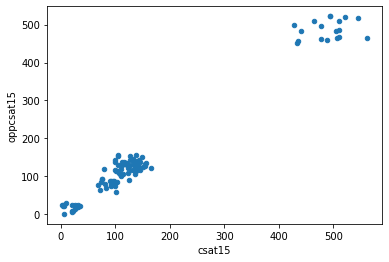

In [0]:
# Line plot
FPX_worlds.plot.scatter('csat15', 'oppcsat15') # ???

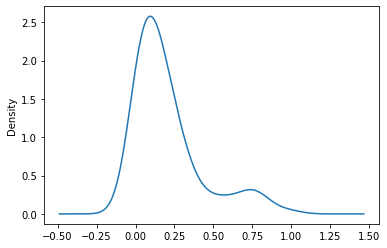

In [0]:
FPX_worlds['kpm'].plot.density()

In [0]:
worlds_2019.columns

Index(['gameid', 'url', 'league', 'split', 'date', 'week', 'game', 'patchno',
       'playerid', 'side', 'position', 'player', 'team', 'champion', 'ban1',
       'ban2', 'ban3', 'ban4', 'ban5', 'gamelength', 'result', 'k', 'd', 'a',
       'teamkills', 'teamdeaths', 'doubles', 'triples', 'quadras', 'pentas',
       'fb', 'fbassist', 'fbvictim', 'fbtime', 'kpm', 'okpm', 'ckpm', 'fd',
       'fdtime', 'teamdragkills', 'oppdragkills', 'elementals',
       'oppelementals', 'firedrakes', 'waterdrakes', 'earthdrakes',
       'airdrakes', 'elders', 'oppelders', 'herald', 'heraldtime', 'ft',
       'fttime', 'firstmidouter', 'firsttothreetowers', 'teamtowerkills',
       'opptowerkills', 'fbaron', 'fbarontime', 'teambaronkills',
       'oppbaronkills', 'dmgtochamps', 'dmgtochampsperminute', 'dmgshare',
       'earnedgoldshare', 'wards', 'wpm', 'wardshare', 'wardkills', 'wcpm',
       'visionwards', 'visionwardbuys', 'visiblewardclearrate',
       'invisiblewardclearrate', 'totalgold', 'earnedg

In [0]:
# TO DO:
# Bin wards
## Into: 
# Bin dragons
## Elementals = total drakes killed by team
# Kills Per Minute is reported as team also:
## isolate this

In [0]:
pd.crosstab(worlds_2019['firsttothreetowers'], worlds_2019['result'])

result,0,1
firsttothreetowers,,
0,576,138
1,138,576


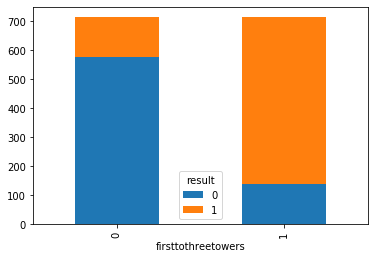

In [0]:
pd.crosstab(worlds_2019['firsttothreetowers'], worlds_2019['result']).plot(kind='bar', stacked='true'); # Strong correlation

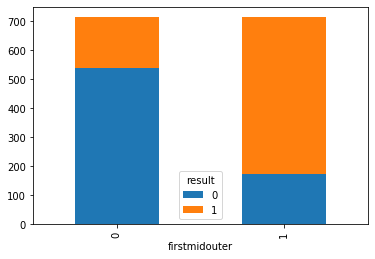

In [0]:
pd.crosstab(worlds_2019['firstmidouter'], worlds_2019['result']).plot(kind='bar', stacked='true') # Almost as strong correlation

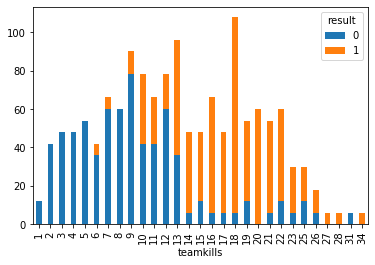

In [0]:
pd.crosstab(worlds_2019['teamkills'], worlds_2019['result']).plot(kind='bar', stacked='true') # Strong correlation

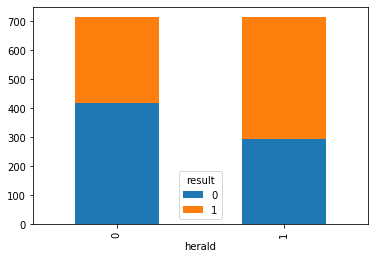

In [0]:
pd.crosstab(worlds_2019['herald'], worlds_2019['result']).plot(kind='bar', stacked='true'); # Slight correlation

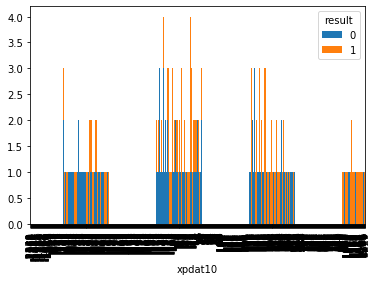

In [0]:
pd.crosstab(worlds_2019['xpdat10'], worlds_2019['result']).plot(kind='bar', stacked='true'); # Needs to be binned, strong correlation

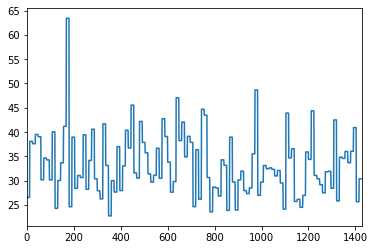

In [0]:
worlds_2019['gamelength'].plot.line()

In [0]:
# test['date'] = pd.to_datetime(test['date'], errors='coerce')
print (test['date'].dtypes)

datetime64[ns]


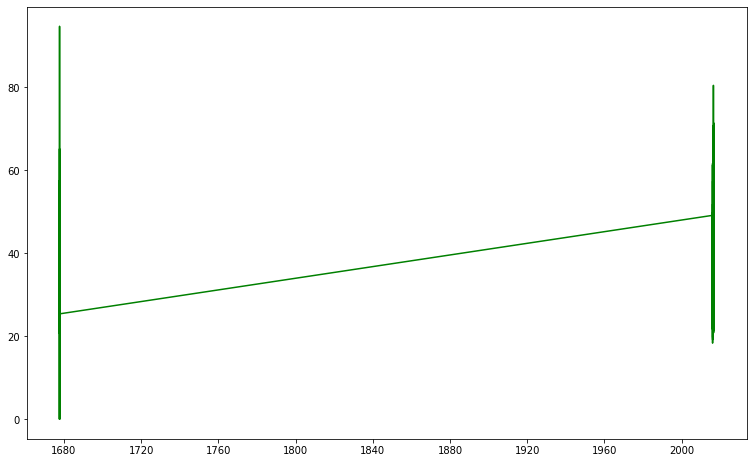

In [0]:
fig = plt.figure(figsize=(10,6))

ax = fig.add_axes([0,0,1,1])

ax.plot(test['date'],
        test['gamelength'],
        color='green')

plt.show()

<BarContainer object of 117648 artists>

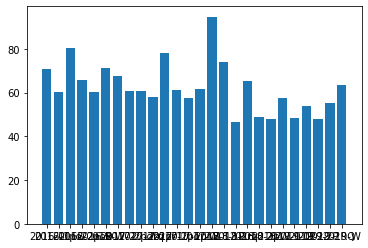

In [0]:
plt.bar(test['split'], test['gamelength'])

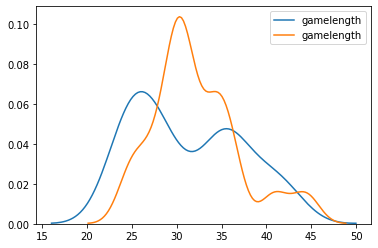

In [0]:
sns.kdeplot(FPX_worlds['gamelength'])
sns.kdeplot(G2_worlds_2019['gamelength']); # G2 a bit longer games, but less longer games

In [0]:
print("FPX average gamelength at worlds is: ", FPX_worlds['gamelength'].mean())
print("G2 average gamelength at worlds is: ", G2_worlds_2019['gamelength'].mean()) # very similar means.

FPX average gamelength at worlds is:  31.259259259259256
G2 average gamelength at worlds is:  32.20833333333333


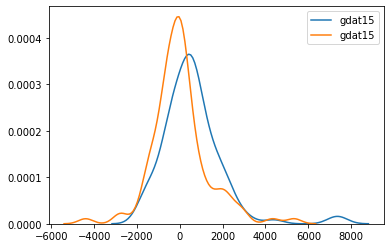

In [0]:
sns.kdeplot(FPX_worlds['gdat15'])
sns.kdeplot(G2_worlds_2019['gdat15']); # G2 were often behind at 15, while FPX were generally ahead.

In [0]:
# sns.distplot(FPX_worlds['invisiblewardclearrate'])
# sns.distplot(G2_worlds_2019['invisiblewardclearrate']);

In [0]:
# Attempting to bin player stats into a new team stat dataframe.
# Binning 5 columns into a new column for the whole dataframe.
FPX_worlds_team = FPX_worlds.groupby(by='team') # Didn't accomplish intent.
FPX_worlds_team.head()

,a,airdrakes,ban1,ban2,ban3,ban4,ban5,champion,ckpm,csat10,csat15,csdat10,csdat15,cspm,cssharepost15,d,date,dmgshare,dmgtochamps,dmgtochampsperminute,doubles,earnedgoldshare,earnedgpm,earthdrakes,elders,elementals,fb,fbaron,fbarontime,fbassist,fbtime,fbvictim,fd,fdtime,firedrakes,firstmidouter,firsttothreetowers,ft,fttime,game,...,oppbaronkills,oppcsat10,oppcsat15,oppdragkills,oppelders,oppelementals,oppgoldat10,oppgoldat15,opptowerkills,oppxpat10,patchno,pentas,player,playerid,position,quadras,result,side,split,team,teambaronkills,teamdeaths,teamdragkills,teamkills,teamtowerkills,totalgold,triples,url,visiblewardclearrate,visionwardbuys,visionwards,wardkills,wards,wardshare,waterdrakes,wcpm,week,wpm,xpat10,xpdat10
557,2.0,0.0,Pantheon,Syndra,Renekton,Tristana,Aatrox,Mordekaiser,0.791269,81.0,138.0,-1.0,5.0,7.257844,NaN,3.0,43750.5,0.205462,12451.0,339.727149,0,0.224586,229.452660,0.0,0.0,0.0,1,0.0,26.176567,0.0,5.03132,0,0,8.911983,0.0,0.0,0,1.0,16.04145,1,...,2.0,82.0,133.0,1.0,0.0,0.0,3350.0,5093.0,9.0,4588.0,9.19,0,GimGoon,6,Top,0,0,Red,2019-W,Funplus Phoenix,0.0,18.0,4.0,11.0,2.0,13171.0,0,http://matchhistory.na.leagueoflegends.com/en/...,,5.0,5,6.0,16.0,0.110345,0.0,0.163711,G,0.436562,4416.0,-172.0
558,7.0,1.0,Pantheon,Syndra,Renekton,Tristana,Aatrox,Elise,0.791269,64.0,96.0,8.0,7.0,6.002729,NaN,4.0,43750.5,0.263993,15998.0,436.507503,0,0.195903,200.148431,0.0,0.0,4.0,0,0.0,26.176567,1.0,5.03132,0,1,8.911983,3.0,0.0,0,1.0,16.04145,1,...,2.0,56.0,89.0,1.0,0.0,1.0,2995.0,4591.0,9.0,3133.0,9.19,0,Tian,7,Jungle,0,0,Red,2019-W,Funplus Phoenix,0.0,18.0,4.0,11.0,2.0,12097.0,0,http://matchhistory.na.leagueoflegends.com/en/...,,22.0,20,20.0,44.0,0.303448,0.0,0.545703,G,1.200546,3382.0,249.0
559,8.0,0.0,Pantheon,Syndra,Renekton,Tristana,Aatrox,Sion,0.791269,78.0,132.0,-6.0,-12.0,7.585266,NaN,3.0,43750.5,0.20703,12546.0,342.319236,0,0.194888,199.111596,0.0,0.0,0.0,0,0.0,26.176567,1.0,5.03132,0,0,8.911983,0.0,0.0,0,1.0,16.04145,1,...,2.0,84.0,144.0,1.0,0.0,0.0,3092.0,5202.0,9.0,4357.0,9.19,0,Doinb,8,Middle,0,0,Red,2019-W,Funplus Phoenix,0.0,18.0,4.0,11.0,2.0,12059.0,0,http://matchhistory.na.leagueoflegends.com/en/...,,6.0,6,17.0,6.0,0.041379,0.0,0.463847,G,0.163711,4830.0,473.0
560,1.0,0.0,Pantheon,Syndra,Renekton,Tristana,Aatrox,Kai'Sa,0.791269,81.0,135.0,-4.0,4.0,10.368349,NaN,4.0,43750.5,0.243152,14735.0,402.046385,1,0.305213,311.826467,0.0,0.0,0.0,0,0.0,26.176567,0.0,5.03132,0,0,8.911983,0.0,0.0,0,1.0,16.04145,1,...,2.0,85.0,131.0,1.0,0.0,0.0,3174.0,5419.0,9.0,3239.0,9.19,0,Lwx,9,ADC,0,0,Red,2019-W,Funplus Phoenix,0.0,18.0,4.0,11.0,2.0,16190.0,0,http://matchhistory.na.leagueoflegends.com/en/...,,5.0,5,18.0,13.0,0.089655,0.0,0.491132,G,0.354707,3312.0,73.0
561,7.0,0.0,Pantheon,Syndra,Renekton,Tristana,Aatrox,Galio,0.791269,13.0,21.0,-2.0,-3.0,1.882674,NaN,4.0,43750.5,0.080363,4870.0,132.878581,0,0.0794099,81.130696,0.0,0.0,0.0,0,0.0,26.176567,0.0,5.03132,0,0,8.911983,0.0,0.0,0,1.0,16.04145,1,...,2.0,15.0,24.0,1.0,0.0,0.0,1976.0,2983.0,9.0,2514.0,9.19,0,Crisp,10,Support,0,0,Red,2019-W,Funplus Phoenix,0.0,18.0,4.0,11.0,2.0,7735.0,0,http://matchhistory.na.leagueoflegends.com/en/...,,21.0,20,11.0,66.0,0.455172,0.0,0.300136,G,1.800819,1984.0,-530.0


In [0]:
# Filter by condition: condition = (df1['emp_title_manager'] == True)

# It looks like I'll be looking into:
- PCA!
- first mid outer
- Ward stats
-- Create new dataframe
- Gold distribution
- team kills
- herald
- cs/xp diff at 15/10
- dragon priority
-- Compare: Which type do they prioritize?
--- Is there a difference in priority based on gamelength?

In [0]:
# Making a Wards dataframe from Worlds 2019 dataset
worlds_wards = worlds_2019.filter(items=['wards', 'wpm', 'wardshare', 'wardkills', 'wcpm',
       'visionwards', 'visionwardbuys', 'visiblewardclearrate',
       'invisiblewardclearrate', 'team'])
worlds_wards.head()

,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,team
0,11,0.414573,0.105769,4,0.150754,4,6,,,DetonatioN FocusMe
1,24,0.904523,0.230769,8,0.301508,11,13,,,DetonatioN FocusMe
2,13,0.489950,0.125000,1,0.037688,6,7,,,DetonatioN FocusMe
3,9,0.339196,0.086538,7,0.263819,3,4,,,DetonatioN FocusMe
4,47,1.771357,0.451923,8,0.301508,13,14,,,DetonatioN FocusMe


In [0]:
worlds_wards.dtypes

wards                       int64
wpm                       float64
wardshare                 float64
wardkills                   int64
wcpm                      float64
visionwards                 int64
visionwardbuys              int64
visiblewardclearrate       object
invisiblewardclearrate     object
team                       object
dtype: object

In [0]:
worlds_wards['visiblewardclearrate']

0               
1               
2               
3               
4               
          ...   
1423            
1424            
1425            
1426    0.592593
1427    0.517857
Name: visiblewardclearrate, Length: 1428, dtype: object

In [0]:
worlds_wards['invisiblewardclearrate']

0               
1               
2               
3               
4               
          ...   
1423            
1424            
1425            
1426    0.298246
1427    0.241379
Name: invisiblewardclearrate, Length: 1428, dtype: object

In [0]:
# Binning ward dataframe
worlds_wards['wpm_bin'] = pd.qcut(worlds_wards['wpm'], 40)
worlds_wards

,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,team,wpm_bin
0,11,0.414573,0.105769,4,0.150754,4,6,,,DetonatioN FocusMe,"(0.399, 0.415]"
1,24,0.904523,0.230769,8,0.301508,11,13,,,DetonatioN FocusMe,"(0.792, 0.92]"
2,13,0.489950,0.125000,1,0.037688,6,7,,,DetonatioN FocusMe,"(0.483, 0.498]"
3,9,0.339196,0.086538,7,0.263819,3,4,,,DetonatioN FocusMe,"(0.336, 0.355]"
4,47,1.771357,0.451923,8,0.301508,13,14,,,DetonatioN FocusMe,"(1.694, 1.804]"
...,...,...,...,...,...,...,...,...,...,...,...
1423,14,0.461032,0.106061,6,0.197585,6,6,,,G2 Esports,"(0.454, 0.467]"
1424,16,0.526894,0.121212,8,0.263447,6,6,,,G2 Esports,"(0.515, 0.53]"
1425,51,1.679473,0.386364,20,0.658617,18,20,,,G2 Esports,"(1.594, 1.694]"
1426,142,4.676180,1.000000,64,2.107574,46,47,0.592593,0.298246,Funplus Phoenix,"(4.353, 5.125]"


In [0]:
worlds_wards['wpm_bin'].value_counts()

(0.399, 0.415]    37
(0.467, 0.483]    37
(4.353, 5.125]    36
(0.792, 0.92]     36
(0.257, 0.292]    36
(0.292, 0.317]    36
(0.317, 0.336]    36
(0.355, 0.369]    36
(0.369, 0.386]    36
(0.434, 0.444]    36
(0.444, 0.454]    36
(0.515, 0.53]     36
(4.044, 4.353]    36
(0.583, 0.623]    36
(0.688, 0.792]    36
(0.553, 0.583]    36
(1.694, 1.804]    36
(1.497, 1.594]    36
(3.728, 4.044]    36
(3.347, 3.551]    36
(3.058, 3.347]    36
(1.804, 2.062]    36
(1.104, 1.187]    36
(0.116, 0.257]    36
(1.392, 1.497]    36
(1.187, 1.275]    36
(0.483, 0.498]    35
(0.498, 0.515]    35
(0.454, 0.467]    35
(1.594, 1.694]    35
(0.425, 0.434]    35
(0.415, 0.425]    35
(0.53, 0.553]     35
(0.386, 0.399]    35
(2.062, 3.058]    35
(1.275, 1.392]    35
(0.336, 0.355]    35
(3.551, 3.728]    35
(0.623, 0.688]    35
(0.92, 1.104]     35
Name: wpm_bin, dtype: int64

In [0]:
# worlds_wards['wardshare_bin'] = pd.qcut(worlds_wards['wardshare'], 10)
# worlds_wards['wcpm_bin'] = pd.qcut(worlds_wards['wcpm'], 20)

In [0]:
# worlds_wards['visiblewardclearrate'] = pd.qcut(worlds_wards['visiblewardclearrate'], 40)
# worlds_wards['invisiblewardclearrate'] = pd.qcut(worlds_wards['invisiblewardclearrate'], 40)

# PCA!

In [0]:
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [0]:
print(worlds_2019.shape)
worlds_2019.head()

(1428, 98)


,gameid,url,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,...,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,1,Blue,Top,Evi,DetonatioN FocusMe,Gnar,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,0,4,4,7,22,0,0,0,0,0,0,0,3.879983,0.000000,0.037688,1.092965,0,9.717567,1,...,23.779817,0,1,11588,436.733668,0.312067,0.206844,11,0.414573,0.105769,4,0.150754,4,6,,,8407,184.059799,8300,-0.151448,180,8,4,1,7.085427,3078,3440,-362,4670,5468,-798,4530,5051,-521,76,90,-14,116,122,-6
1,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,2,Blue,Jungle,Steal,DetonatioN FocusMe,Ekko,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,1,4,5,7,22,0,0,0,0,0,0,0,3.879983,0.037688,0.263819,1.092965,1,9.717567,1,...,23.779817,0,1,7925,298.680905,0.213422,0.166862,24,0.904523,0.230769,8,0.301508,11,13,,,7463,148.481910,7360,-0.296789,35,96,76,0,4.937186,3684,4055,-371,4912,6278,-1366,3679,3928,-249,60,64,-4,88,105,-17
2,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,3,Blue,Middle,Ceros,DetonatioN FocusMe,Nocturne,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,1,5,6,7,22,0,0,0,0,0,0,0,3.879983,0.037688,0.113065,1.092965,0,9.717567,1,...,23.779817,0,1,7557,284.811558,0.203512,0.210106,13,0.489950,0.125000,1,0.037688,6,7,,,8484,186.961809,7700,-0.281729,186,6,4,0,7.236181,3926,3569,357,5487,6116,-629,4751,4533,218,88,85,3,131,150,-19
3,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,4,Blue,ADC,Yutapon,DetonatioN FocusMe,Lucian,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,3,4,1,7,22,1,0,0,0,0,0,0,3.879983,0.113065,0.414573,1.092965,0,9.717567,1,...,23.779817,0,1,7369,277.726131,0.198449,0.300743,9,0.339196,0.086538,7,0.263819,3,4,,,10624,267.615075,10150,-0.215385,219,20,20,0,9.007538,3579,3969,-390,5313,7142,-1829,3526,3532,-6,87,76,11,119,134,-15
4,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,5,Blue,Support,Gaeng,DetonatioN FocusMe,Thresh,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,2,5,2,7,22,0,0,0,0,0,0,1,3.879983,0.075377,0.000000,1.092965,0,9.717567,1,...,23.779817,0,1,2694,101.532663,0.07255,0.115445,47,1.771357,0.451923,8,0.301508,13,14,,,6249,102.728141,5450,-0.296875,12,2,2,0,0.527638,2088,2394,-306,3163,4319,-1156,2731,2376,355,4,3,1,6,5,1


In [0]:
# Clean worlds_2019 dataset
worlds_2019.isnull().sum().sort_values()

gameid               0
visionwardbuys       0
visionwards          0
wcpm                 0
wardkills            0
                  ... 
csdat15              0
ban5                 6
fbarontime          48
fbaron              48
heraldtime        1190
Length: 98, dtype: int64

In [0]:
# We're making a copy of our data in case we mess something up.
worlds_2019_processed = worlds_2019.copy()
worlds_2019_processed.head()

,gameid,url,league,split,date,week,game,patchno,playerid,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,...,fbarontime,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,1,Blue,Top,Evi,DetonatioN FocusMe,Gnar,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,0,4,4,7,22,0,0,0,0,0,0,0,3.879983,0.000000,0.037688,1.092965,0,9.717567,1,...,23.779817,0,1,11588,436.733668,0.312067,0.206844,11,0.414573,0.105769,4,0.150754,4,6,,,8407,184.059799,8300,-0.151448,180,8,4,1,7.085427,3078,3440,-362,4670,5468,-798,4530,5051,-521,76,90,-14,116,122,-6
1,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,2,Blue,Jungle,Steal,DetonatioN FocusMe,Ekko,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,1,4,5,7,22,0,0,0,0,0,0,0,3.879983,0.037688,0.263819,1.092965,1,9.717567,1,...,23.779817,0,1,7925,298.680905,0.213422,0.166862,24,0.904523,0.230769,8,0.301508,11,13,,,7463,148.481910,7360,-0.296789,35,96,76,0,4.937186,3684,4055,-371,4912,6278,-1366,3679,3928,-249,60,64,-4,88,105,-17
2,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,3,Blue,Middle,Ceros,DetonatioN FocusMe,Nocturne,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,1,5,6,7,22,0,0,0,0,0,0,0,3.879983,0.037688,0.113065,1.092965,0,9.717567,1,...,23.779817,0,1,7557,284.811558,0.203512,0.210106,13,0.489950,0.125000,1,0.037688,6,7,,,8484,186.961809,7700,-0.281729,186,6,4,0,7.236181,3926,3569,357,5487,6116,-629,4751,4533,218,88,85,3,131,150,-19
3,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,4,Blue,ADC,Yutapon,DetonatioN FocusMe,Lucian,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,3,4,1,7,22,1,0,0,0,0,0,0,3.879983,0.113065,0.414573,1.092965,0,9.717567,1,...,23.779817,0,1,7369,277.726131,0.198449,0.300743,9,0.339196,0.086538,7,0.263819,3,4,,,10624,267.615075,10150,-0.215385,219,20,20,0,9.007538,3579,3969,-390,5313,7142,-1829,3526,3532,-6,87,76,11,119,134,-15
4,1070340,https://matchhistory.euw.leagueoflegends.com/e...,WC,2019-W,43740.286146,PI-RR,1,9.19,5,Blue,Support,Gaeng,DetonatioN FocusMe,Thresh,Qiyana,Gangplank,Akali,Elise,Olaf,26.533333,0,2,5,2,7,22,0,0,0,0,0,0,1,3.879983,0.075377,0.000000,1.092965,0,9.717567,1,...,23.779817,0,1,2694,101.532663,0.07255,0.115445,47,1.771357,0.451923,8,0.301508,13,14,,,6249,102.728141,5450,-0.296875,12,2,2,0,0.527638,2088,2394,-306,3163,4319,-1156,2731,2376,355,4,3,1,6,5,1


In [0]:
# Dropping columns that interfere with result. These include the NaN columns.
worlds_2019_processed = worlds_2019_processed.drop(['url', 'league', 'split', 'date', 'week', 'patchno', 'playerid', 'fbarontime', 'fbaron', 'heraldtime'], axis=1)

In [0]:
# Separate X and Y variables
Y = worlds_2019['result']
print(Y.shape)
Y.head()

(1428,)


0    0
1    0
2    0
3    0
4    0
Name: result, dtype: int64

In [0]:
# check for number of categorical vs numeric columns
cat_cols = worlds_2019_processed.columns[worlds_2019_processed.dtypes=='object']
num_cols = worlds_2019_processed.columns[worlds_2019_processed.dtypes!='object']

print(f'{len(cat_cols)} categorical columns')
print(f'{len(num_cols)} numerical columns')

19 categorical columns
69 numerical columns


In [0]:
# Categorically Encode our Variables:
# They need to all be numeric before we do PCA.
# https://pbpython.com/categorical-encoding.html

# Cast categorical columns to "category" data type
worlds_2019_processed[cat_cols] = worlds_2019_processed[cat_cols].astype('category')

worlds_2019_processed.dtypes

gameid          int64
game         category
side         category
position     category
player       category
               ...   
oppcsat10       int64
csdat10         int64
csat15          int64
oppcsat15       int64
csdat15         int64
Length: 88, dtype: object

In [0]:
# Replace all category cell values with their numeric category codes
for col in cat_cols:
  worlds_2019_processed[col] = worlds_2019_processed[col].cat.codes

print(worlds_2019_processed.shape)
worlds_2019_processed.head()

(1428, 88)


,gameid,game,side,position,player,team,champion,ban1,ban2,ban3,ban4,ban5,gamelength,result,k,d,a,teamkills,teamdeaths,doubles,triples,quadras,pentas,fb,fbassist,fbvictim,fbtime,kpm,okpm,ckpm,fd,fdtime,teamdragkills,oppdragkills,elementals,oppelementals,firedrakes,waterdrakes,earthdrakes,airdrakes,...,opptowerkills,teambaronkills,oppbaronkills,dmgtochamps,dmgtochampsperminute,dmgshare,earnedgoldshare,wards,wpm,wardshare,wardkills,wcpm,visionwards,visionwardbuys,visiblewardclearrate,invisiblewardclearrate,totalgold,earnedgpm,goldspent,gspd,minionkills,monsterkills,monsterkillsownjungle,monsterkillsenemyjungle,cspm,goldat10,oppgoldat10,gdat10,goldat15,oppgoldat15,gdat15,xpat10,oppxpat10,xpdat10,csat10,oppcsat10,csdat10,csat15,oppcsat15,csdat15
0,1070340,0,0,5,35,4,24,17,6,0,8,39,26.533333,0,0,4,4,7,22,0,0,0,0,0,0,0,3.879983,0.000000,0.037688,1.092965,0,9.717567,1,2,0,0,0,0,0,0,...,10,0,1,11588,436.733668,1039,600,11,0.414573,0.105769,4,0.150754,4,6,189,188,8407,184.059799,8300,-0.151448,180,8,4,1,7.085427,3078,3440,-362,4670,5468,-798,4530,5051,-521,76,90,-14,116,122,-6
1,1070340,0,0,1,98,4,16,17,6,0,8,39,26.533333,0,1,4,5,7,22,0,0,0,0,0,0,0,3.879983,0.037688,0.263819,1.092965,1,9.717567,1,2,1,2,0,0,0,1,...,10,0,1,7925,298.680905,661,363,24,0.904523,0.230769,8,0.301508,11,13,189,188,7463,148.481910,7360,-0.296789,35,96,76,0,4.937186,3684,4055,-371,4912,6278,-1366,3679,3928,-249,60,64,-4,88,105,-17
2,1070340,0,0,2,17,4,55,17,6,0,8,39,26.533333,0,1,5,6,7,22,0,0,0,0,0,0,0,3.879983,0.037688,0.113065,1.092965,0,9.717567,1,2,0,0,0,0,0,0,...,10,0,1,7557,284.811558,612,618,13,0.489950,0.125000,1,0.037688,6,7,189,188,8484,186.961809,7700,-0.281729,186,6,4,0,7.236181,3926,3569,357,5487,6116,-629,4751,4533,218,88,85,3,131,150,-19
3,1070340,0,0,0,120,4,46,17,6,0,8,39,26.533333,0,3,4,1,7,22,1,0,0,0,0,0,0,3.879983,0.113065,0.414573,1.092965,0,9.717567,1,2,0,0,0,0,0,0,...,10,0,1,7369,277.726131,591,1129,9,0.339196,0.086538,7,0.263819,3,4,189,188,10624,267.615075,10150,-0.215385,219,20,20,0,9.007538,3579,3969,-390,5313,7142,-1829,3526,3532,-6,87,76,11,119,134,-15
4,1070340,0,0,3,40,4,80,17,6,0,8,39,26.533333,0,2,5,2,7,22,0,0,0,0,0,0,1,3.879983,0.075377,0.000000,1.092965,0,9.717567,1,2,0,0,0,0,0,0,...,10,0,1,2694,101.532663,113,185,47,1.771357,0.451923,8,0.301508,13,14,189,188,6249,102.728141,5450,-0.296875,12,2,2,0,0.527638,2088,2394,-306,3163,4319,-1156,2731,2376,355,4,3,1,6,5,1


In [0]:
worlds_2019_processed.dtypes # Only numerics

gameid       int64
game          int8
side          int8
position      int8
player       int16
             ...  
oppcsat10    int64
csdat10      int64
csat15       int64
oppcsat15    int64
csdat15      int64
Length: 88, dtype: object

In [0]:
# worlds_2019_processed.select_dtypes(include=[np.float])

In [0]:
print("Data: \n", worlds_2019_processed.head())

#Instantiate
scaler = StandardScaler()

# Instantiate / fit_transform
Z = scaler.fit_transform(worlds_2019_processed)
# print("\n Standardized Data: \n", Z.head())

# create the PCA instance
pca = PCA(10)

# fit on data
pca.fit(Z)

# access values and vectors
# print("\n Eigenvectors: \n", pca.components_)
# print("\n Eigenvalues: \n", pca.explained_variance_)

# transform data
B = pca.transform(Z)
print("\n Projected Data: \n", B)

Data: 
     gameid  game  side  position  ...  csdat10  csat15  oppcsat15  csdat15
0  1070340     0     0         5  ...      -14     116        122       -6
1  1070340     0     0         1  ...       -4      88        105      -17
2  1070340     0     0         2  ...        3     131        150      -19
3  1070340     0     0         0  ...       11     119        134      -15
4  1070340     0     0         3  ...        1       6          5        1

[5 rows x 88 columns]

 Projected Data: 
 [[-3.1695652   3.39620073 -0.95135057 ...  0.64469115 -0.40175908
   0.50931031]
 [-2.11036992  3.43790871  0.91693895 ... -0.06617088 -0.94993627
   0.96712809]
 [-3.31692635  3.09434395 -0.71479351 ...  0.58978449 -0.51647663
   0.62779368]
 ...
 [-3.78167306  1.77418564  0.3064947  ...  0.81352624  0.36342274
  -1.89074201]
 [12.60646078 -1.84144105 -0.96472462 ... -0.0310946  -0.90155499
  -1.643191  ]
 [12.12538467  2.9657346  -1.51659239 ...  0.4474255   0.3693135
  -1.76365877]]


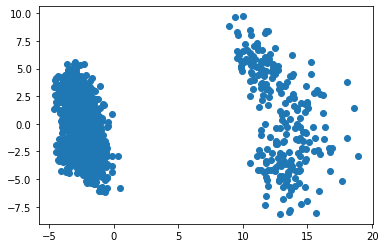

In [0]:
plt.scatter(B[:,0], B[:, 1])

In [0]:
# Define scree plot function
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=4.5)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

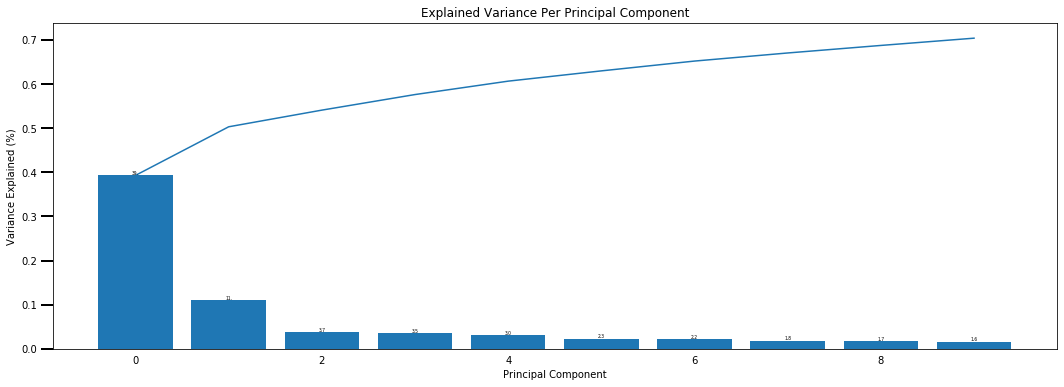

In [0]:
# Scree plot
scree_plot(pca)

In [0]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
columns = worlds_2019_processed.corr().result.index.tolist()
values = worlds_2019_processed.corr().result.values.tolist()

In [0]:
worlds_2019_processed_rounded = []
for val in values:
 worlds_2019_processed_rounded.append(round(val, 4))

In [0]:
worlds_2019_processed_rounded

[0.0,
 0.0,
 -0.042,
 0.0,
 -0.0297,
 -0.0061,
 0.0246,
 0.0049,
 0.0007,
 -0.0877,
 0.0339,
 0.0759,
 0.0,
 1.0,
 0.2565,
 -0.2657,
 0.2796,
 0.6147,
 -0.6132,
 0.0658,
 0.0281,
 0.0047,
 0.0009,
 0.0489,
 0.0572,
 -0.0489,
 -0.0,
 0.2784,
 -0.2784,
 0.0,
 0.1165,
 0.0,
 0.6238,
 -0.6238,
 0.2399,
 -0.2399,
 0.1349,
 0.1342,
 0.1538,
 0.163,
 0.1416,
 -0.1416,
 0.1765,
 0.395,
 0.0,
 0.5126,
 0.6134,
 0.8945,
 -0.8945,
 0.6966,
 -0.6966,
 0.0998,
 0.1177,
 0.0026,
 -0.0007,
 0.0158,
 0.0203,
 0.0,
 0.0531,
 0.0584,
 0.0183,
 -0.001,
 0.1235,
 0.0461,
 0.0849,
 0.1451,
 0.0484,
 0.5217,
 0.0121,
 0.092,
 0.0161,
 0.2612,
 0.0344,
 0.0189,
 -0.0189,
 0.2524,
 0.0355,
 -0.0355,
 0.371,
 0.0103,
 -0.0103,
 0.1995,
 0.0128,
 -0.0128,
 0.1553,
 0.0162,
 -0.0162,
 0.2038]